In [ ]:
!pip install keras

Could not fetch URL https://pypi.org/simple/keras/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/keras/ (Caused by SSLError(SSLError(1, '[SSL: WRONG_VERSION_NUMBER] wrong version number (_ssl.c:1125)'))) - skipping
Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(SSLError(1, '[SSL: WRONG_VERSION_NUMBER] wrong version number (_ssl.c:1125)'))) - skipping


ERROR: Could not find a version that satisfies the requirement keras
ERROR: No matching distribution found for keras


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import math
import os
import warnings
warnings.filterwarnings('ignore')

from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix

import keras
from tensorflow import keras
from keras import Sequential
from keras import layers
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

from sklearn.model_selection import train_test_split

plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams['figure.dpi'] = 300
colors = ["#B6EE56", "#D85F9C", "#EEA756", "#56EEE8"]

ModuleNotFoundError: ignored

In [ ]:
try:
    if tf.test.gpu_device_name():
        physical_devices = tf.config.experimental.list_physical_devices('GPU')
        print('GPU active! -', physical_devices)
    else:
        print('GPU not active!')
except Exception as e:
    print('An error occurred while checking the GPU:', e)

GPU active! - [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
from google.colab import drive #esta si
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/gdrive/MyDrive/kaggle'

In [ ]:
%cd /content/gdrive/MyDrive/kaggle

/content/gdrive/MyDrive/kaggle


In [ ]:
!ls

alzheimer-mri-dataset  alzheimer-mri-dataset.zip  https:  kaggle.json


In [ ]:
!kaggle datasets download -d sachinkumar413/alzheimer-mri-dataset

alzheimer-mri-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!mkdir alzheimer-mri-dataset
!mv alzheimer-mri-dataset.zip alzheimer-mri-dataset

mkdir: cannot create directory ‘alzheimer-mri-dataset’: File exists


In [ ]:
%cd alzheimer-mri-dataset/

/content/gdrive/MyDrive/kaggle/alzheimer-mri-dataset


In [ ]:
!unzip alzheimer-mri-dataset.zip

Archive:  alzheimer-mri-dataset.zip
replace Dataset/Mild_Demented/mild.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

A search has been initiated within the folder named 'Dataset'.
There are 896 images in the Mild_Demented folder.
There are 64 images in the Moderate_Demented folder.
There are 3200 images in the Non_Demented folder.
There are 2240 images in the Very_Mild_Demented folder.
The search has been completed.


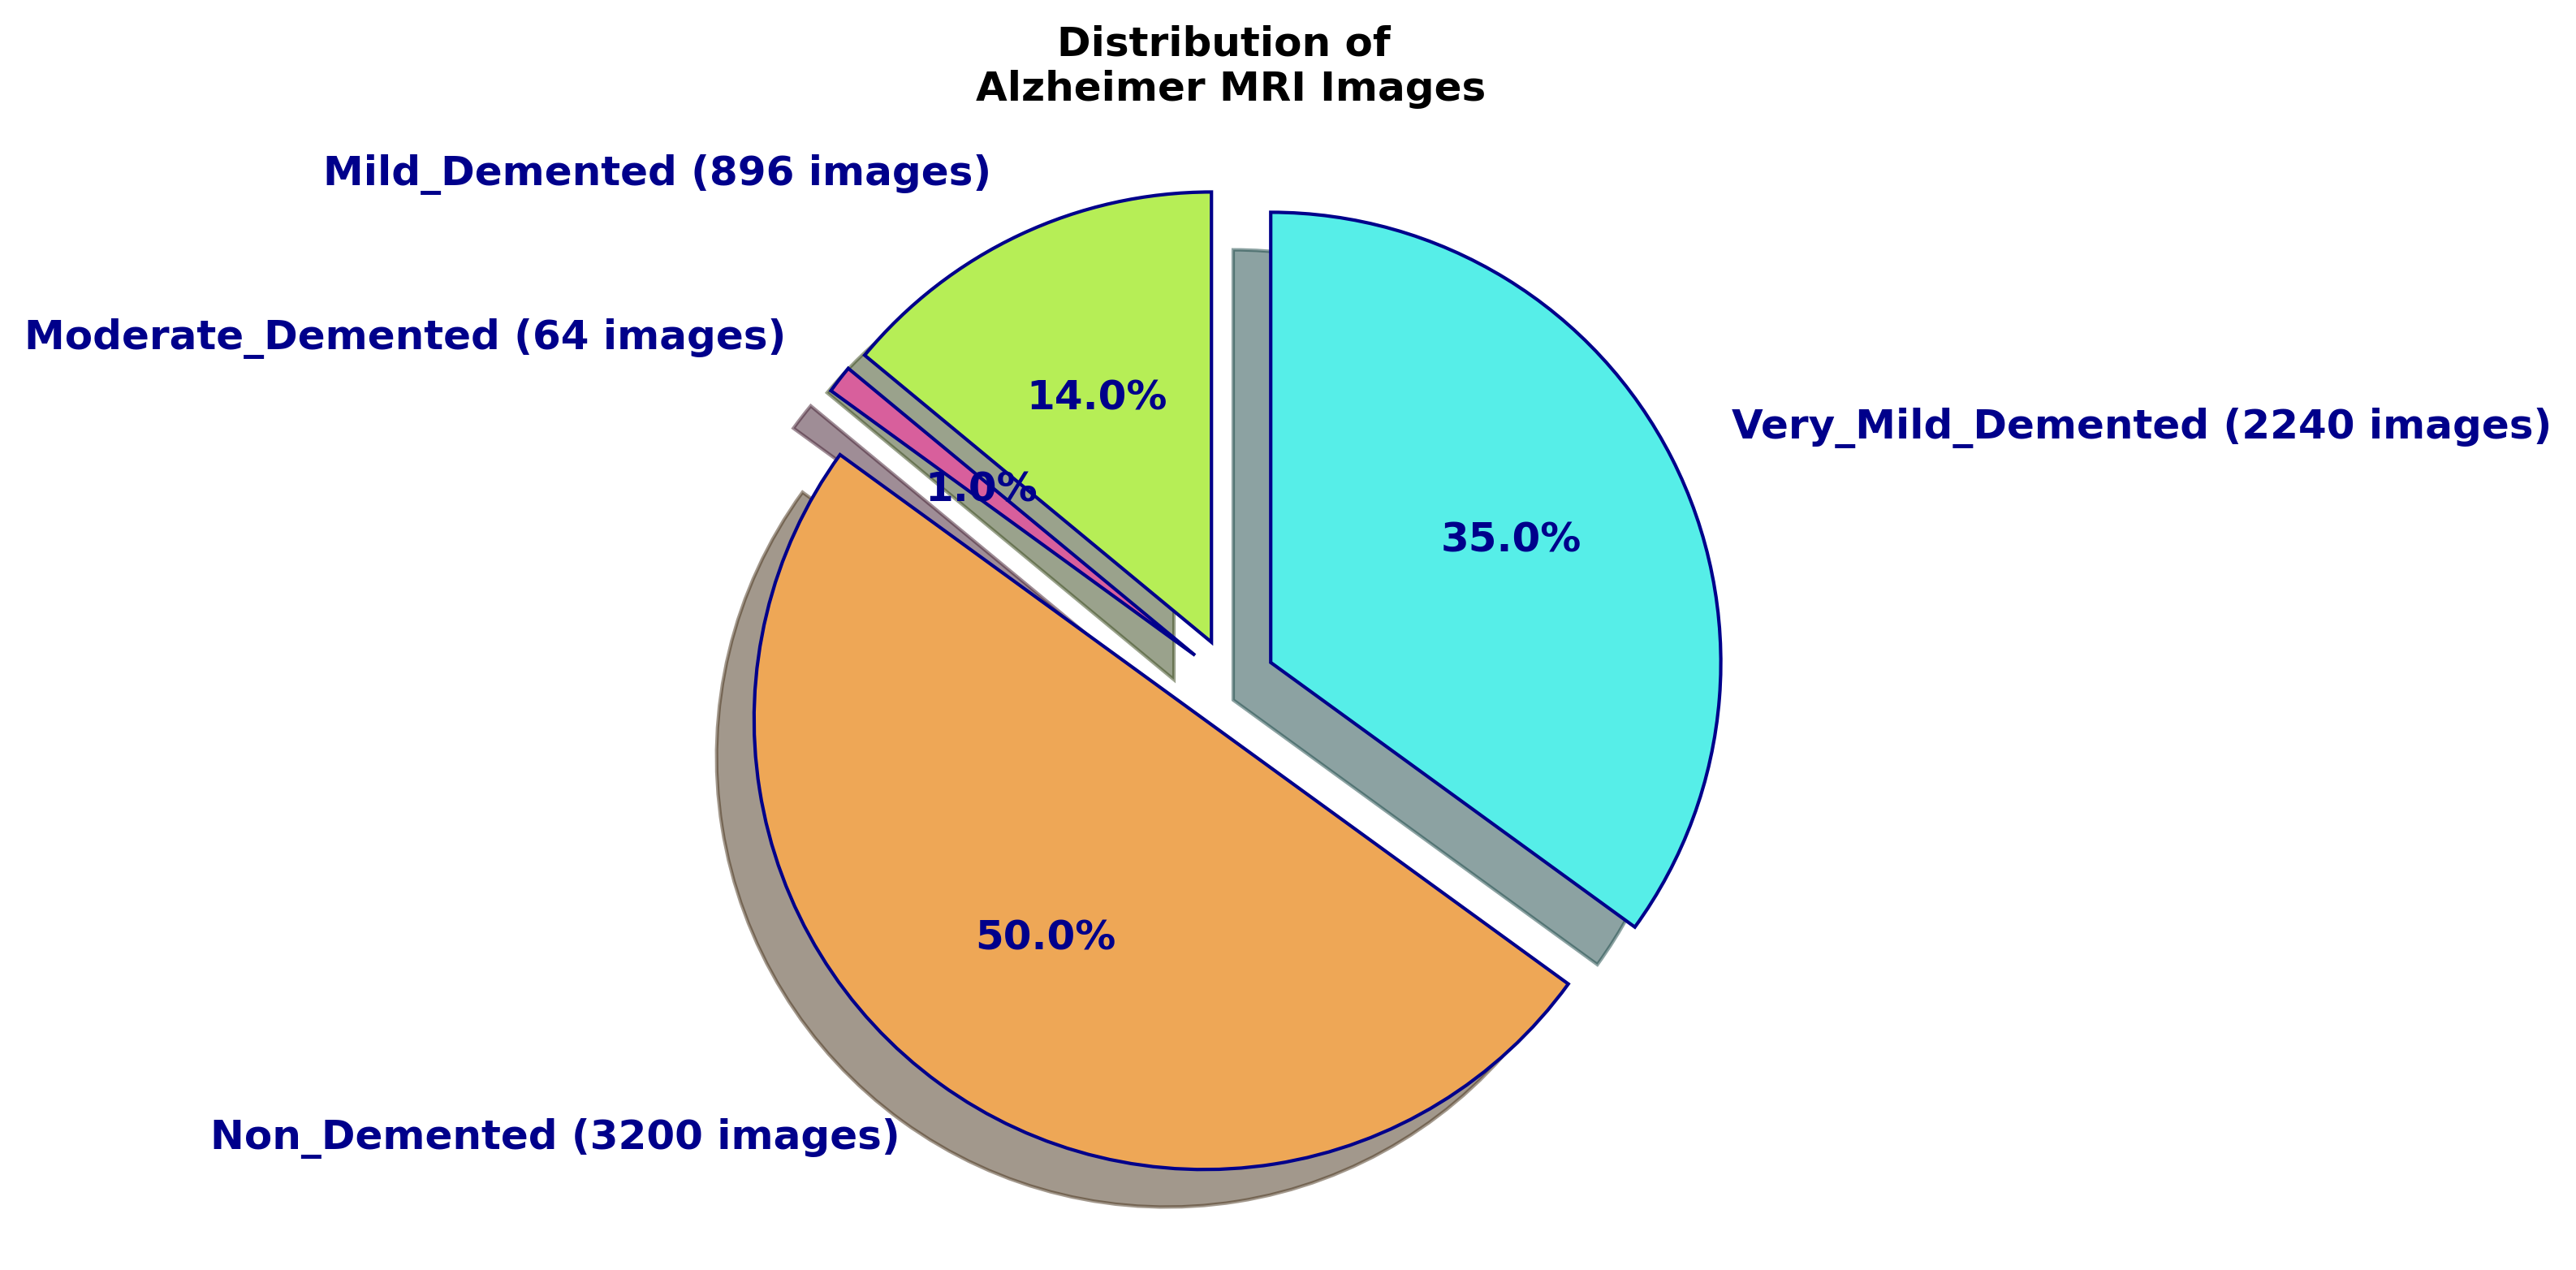

In [ ]:
class_dist = {} #este si
def image_counter(folder_path):
    basename = os.path.basename(folder_path)
    print('\033[92m'+f"A search has been initiated within the folder named '{basename}'."+'\033[0m')
    image_extensions = ['.jpg', '.jpeg', '.png']

    for root, dirs, _ in os.walk(folder_path):
        for dir_name in dirs:
            dir_path = os.path.join(root, dir_name)
            count = 0

            for filename in os.listdir(dir_path):
                file_ext = os.path.splitext(filename)[1].lower()

                if file_ext in image_extensions:
                    count += 1

            class_dist[dir_name] = count
            print(f"There are \033[35m{count}\033[0m images in the {dir_name} folder.")
    print('\033[92m'+"The search has been completed."+'\033[0m')

    keys = list(class_dist.keys())
    values = list(class_dist.values())
    explode = (0.1,)*len(keys)

    labels = [f'{key} ({value} images)' for key, value in zip(keys, values)]

    plt.pie(values, explode=explode,labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90, colors=colors, textprops={'fontsize': 12, "fontweight" : "bold", "color":"darkblue"},  wedgeprops=
           {'edgecolor':'darkblue'} , labeldistance=1.15)
    plt.title("Distribution of \nAlzheimer MRI Images", size=12, fontweight="bold")

#PATH = '/content/gdrive/MyDrive/proyecto final machineL/Dataset'
PATH = '/content/gdrive/MyDrive/kaggle/alzheimer-mri-dataset/Dataset'
image_counter(PATH)

In [ ]:
PATH

'/content/gdrive/MyDrive/kaggle/alzheimer-mri-dataset/Dataset'

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(PATH,color_mode='grayscale',
                                                batch_size = 32,
                                                image_size=(128, 128),
                                                shuffle=True,
                                                seed=42,)

class_names = data.class_names

Found 6400 files belonging to 4 classes.


In [ ]:
data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
imagenes_np = []

In [ ]:
labels_np = []

In [ ]:
indice = 0
for imagenes, labels in data:
  for idx, img in enumerate(imagenes):
    if labels[idx] == 1:
      imagenes_np.append(img)
      labels_np.append(labels)

In [ ]:
#imagenes_np=imagenes_np.reshape((imagenes_np.shape[0], -1))

In [ ]:
imagenes_np = np.array(imagenes_np)
labels_np = np.array(labels_np)

In [ ]:
#U,S,VT = np.linalg.svd(imagenes_np[:1000,:], full_matrices=False) #reducción de dimensiones

In [ ]:
U,S,VT = np.linalg.svd(imagenes_np, full_matrices=False) #reducción de dimensiones

In [ ]:
S[:2].sum()/S.sum()

0.031615533

ValueError: ignored

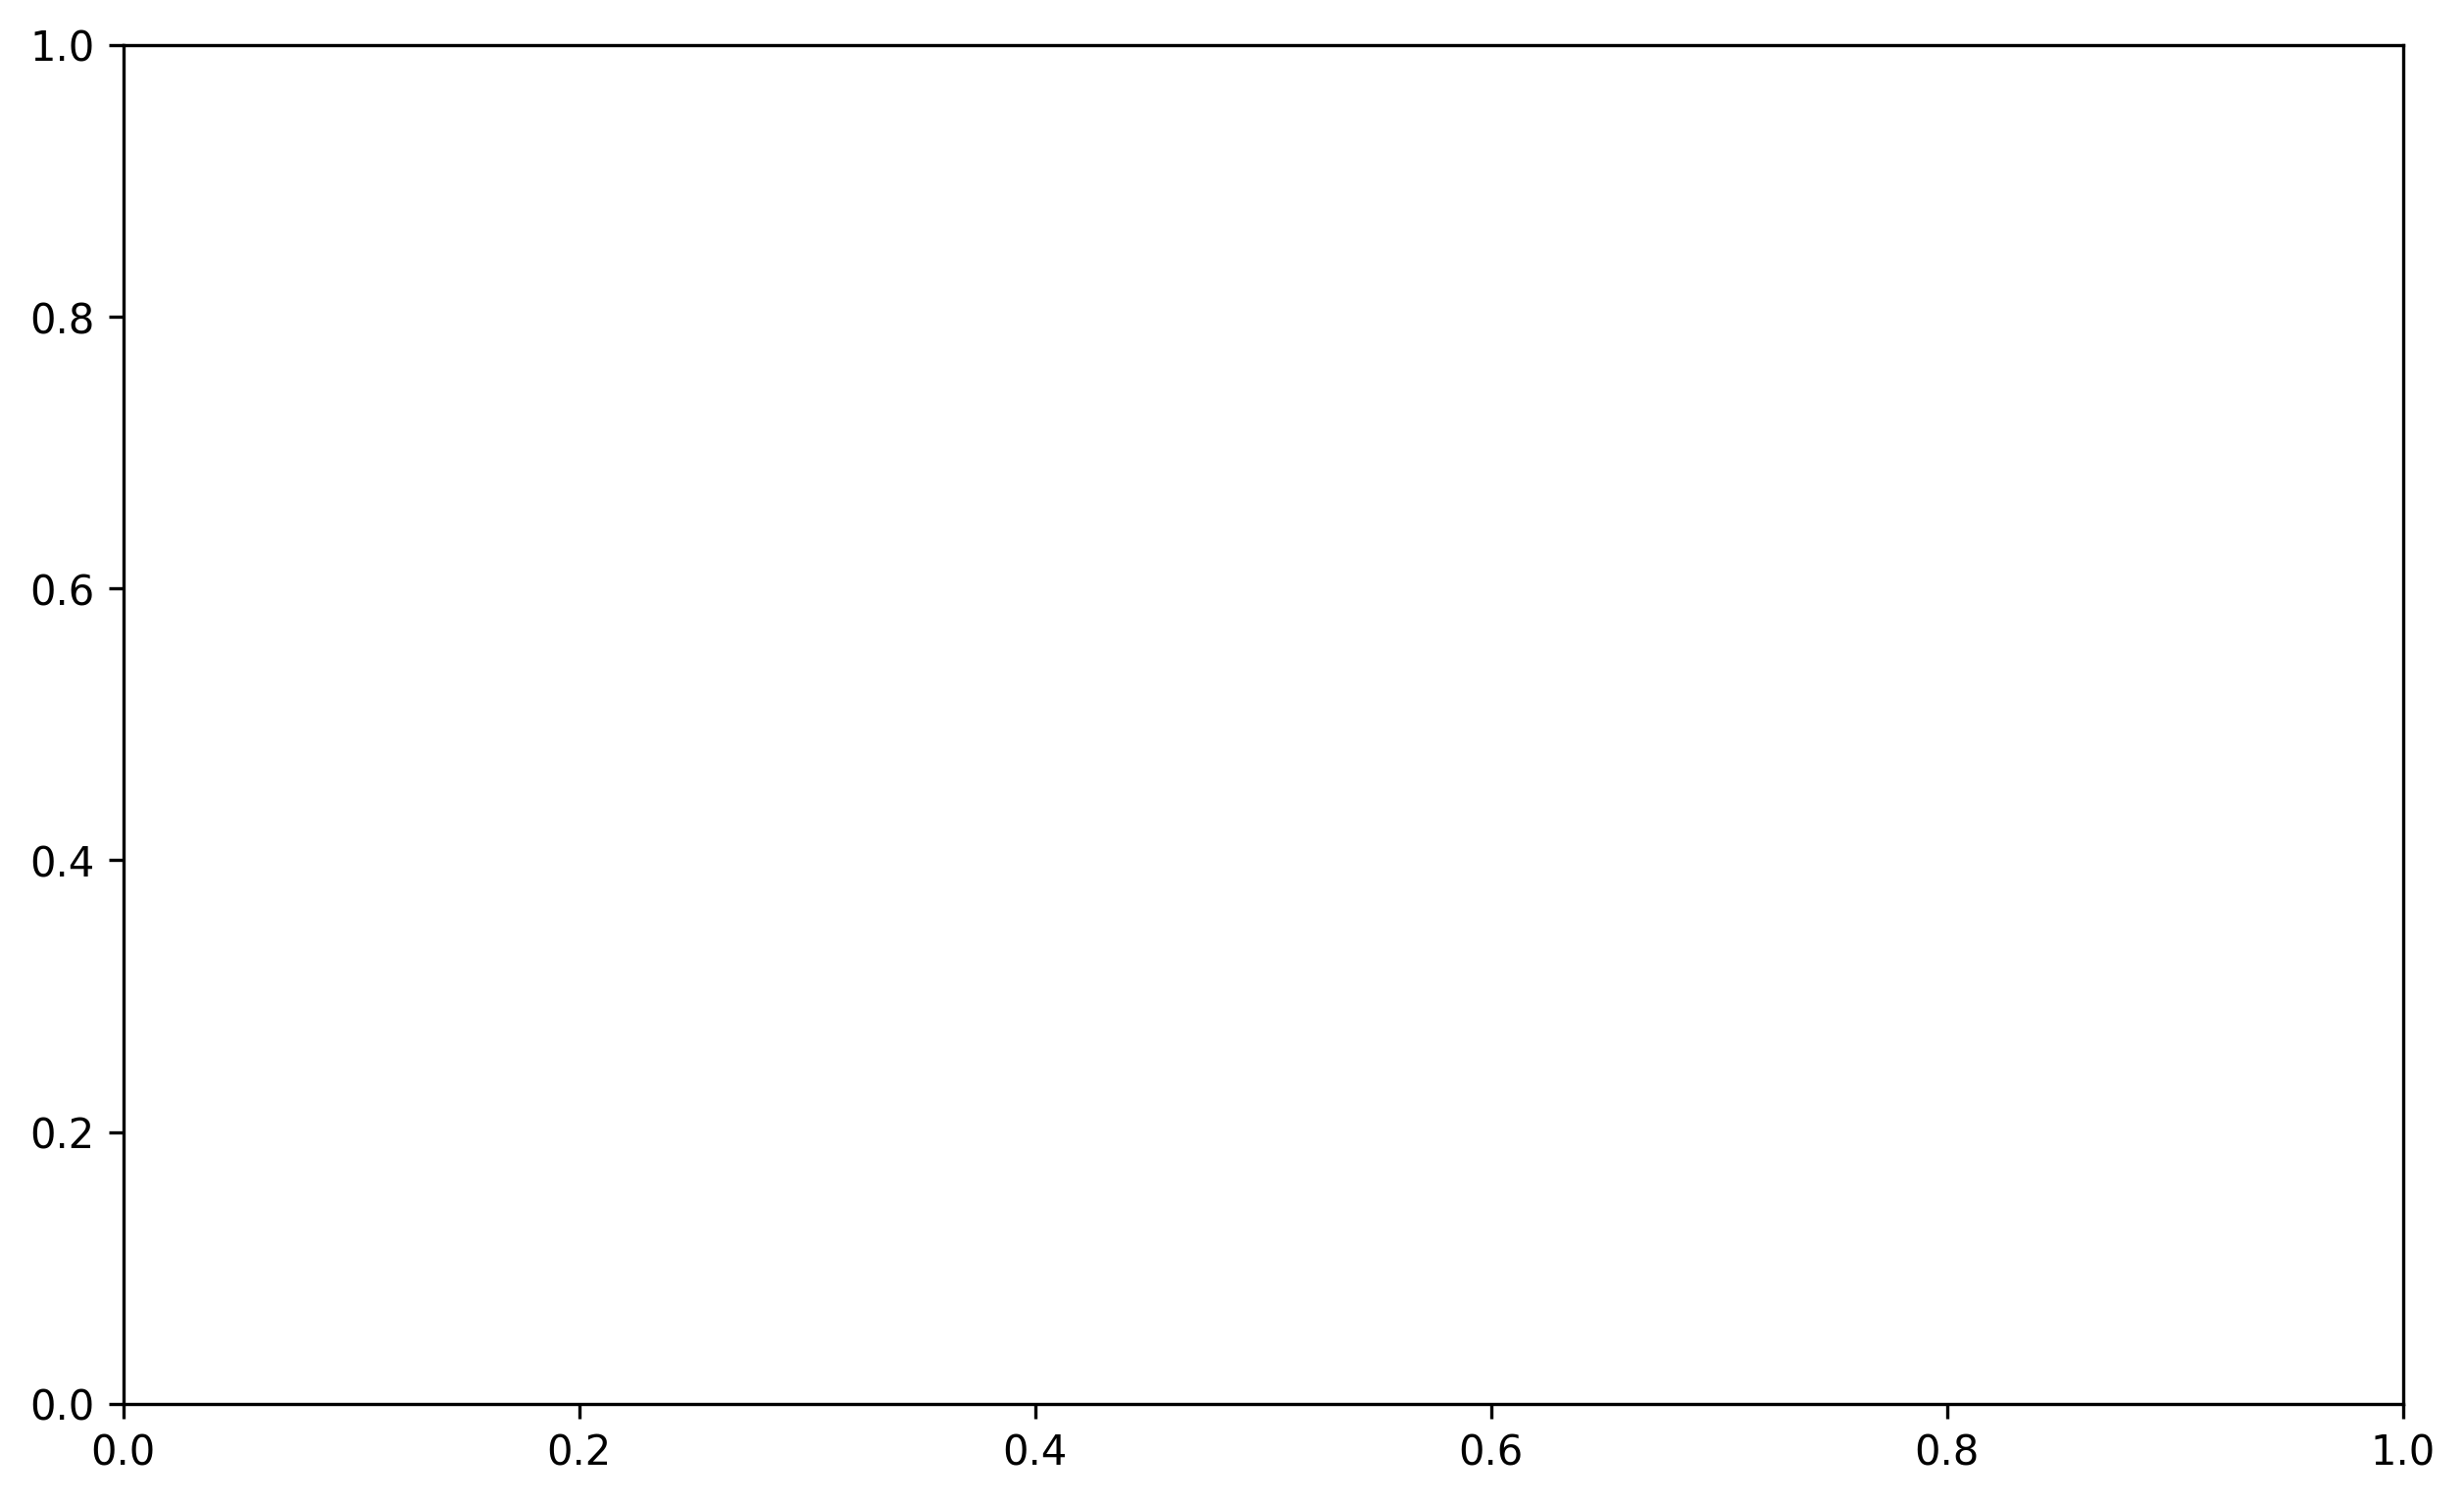

In [ ]:
plt.plot(U[:,0], U[:,1],'o')

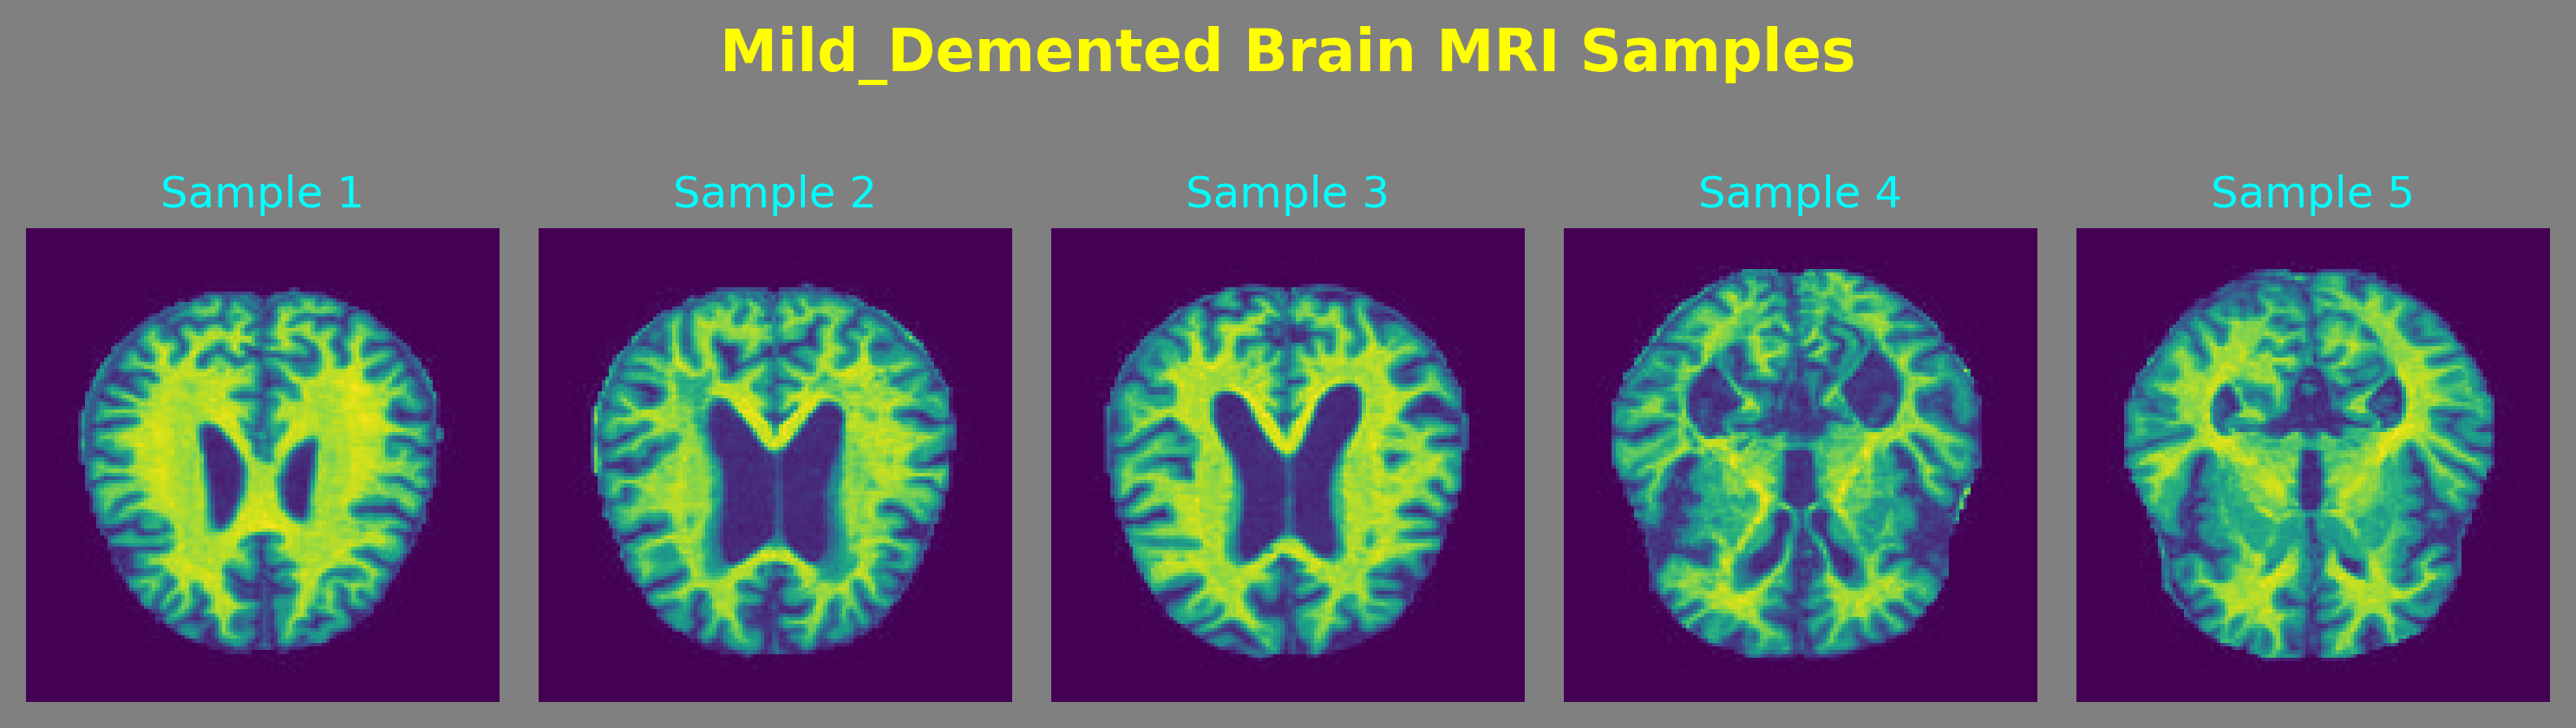

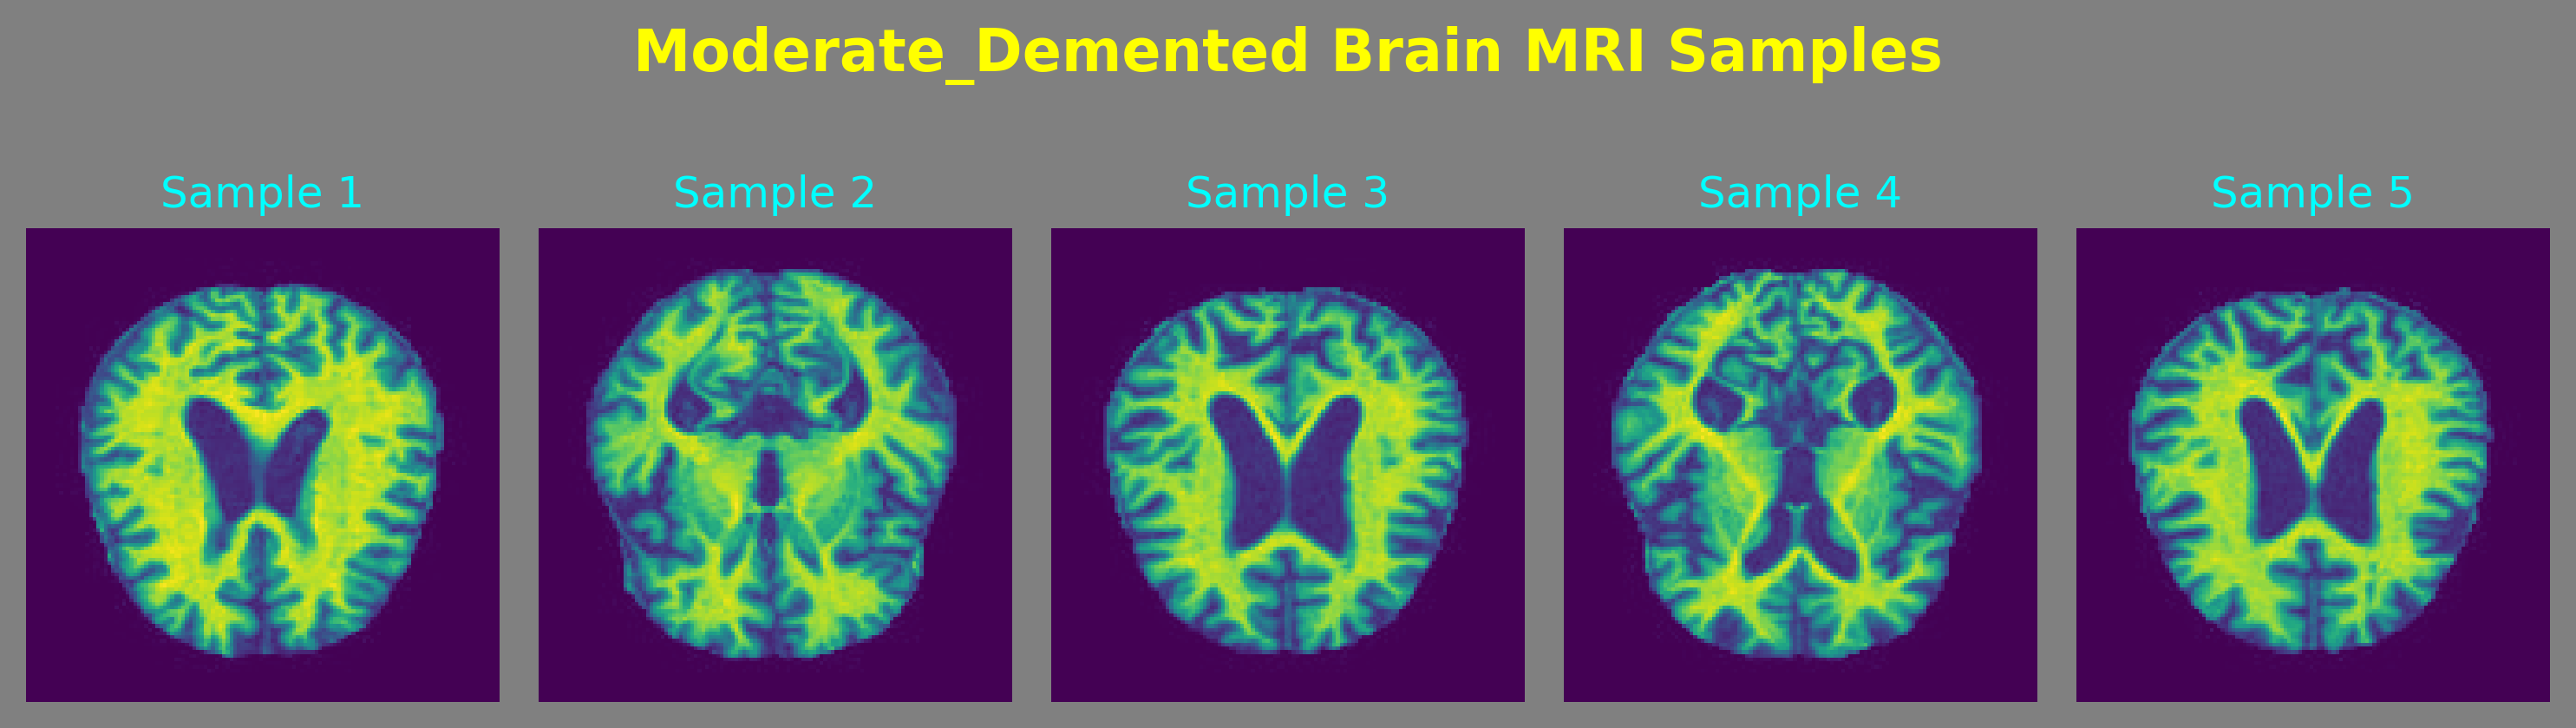

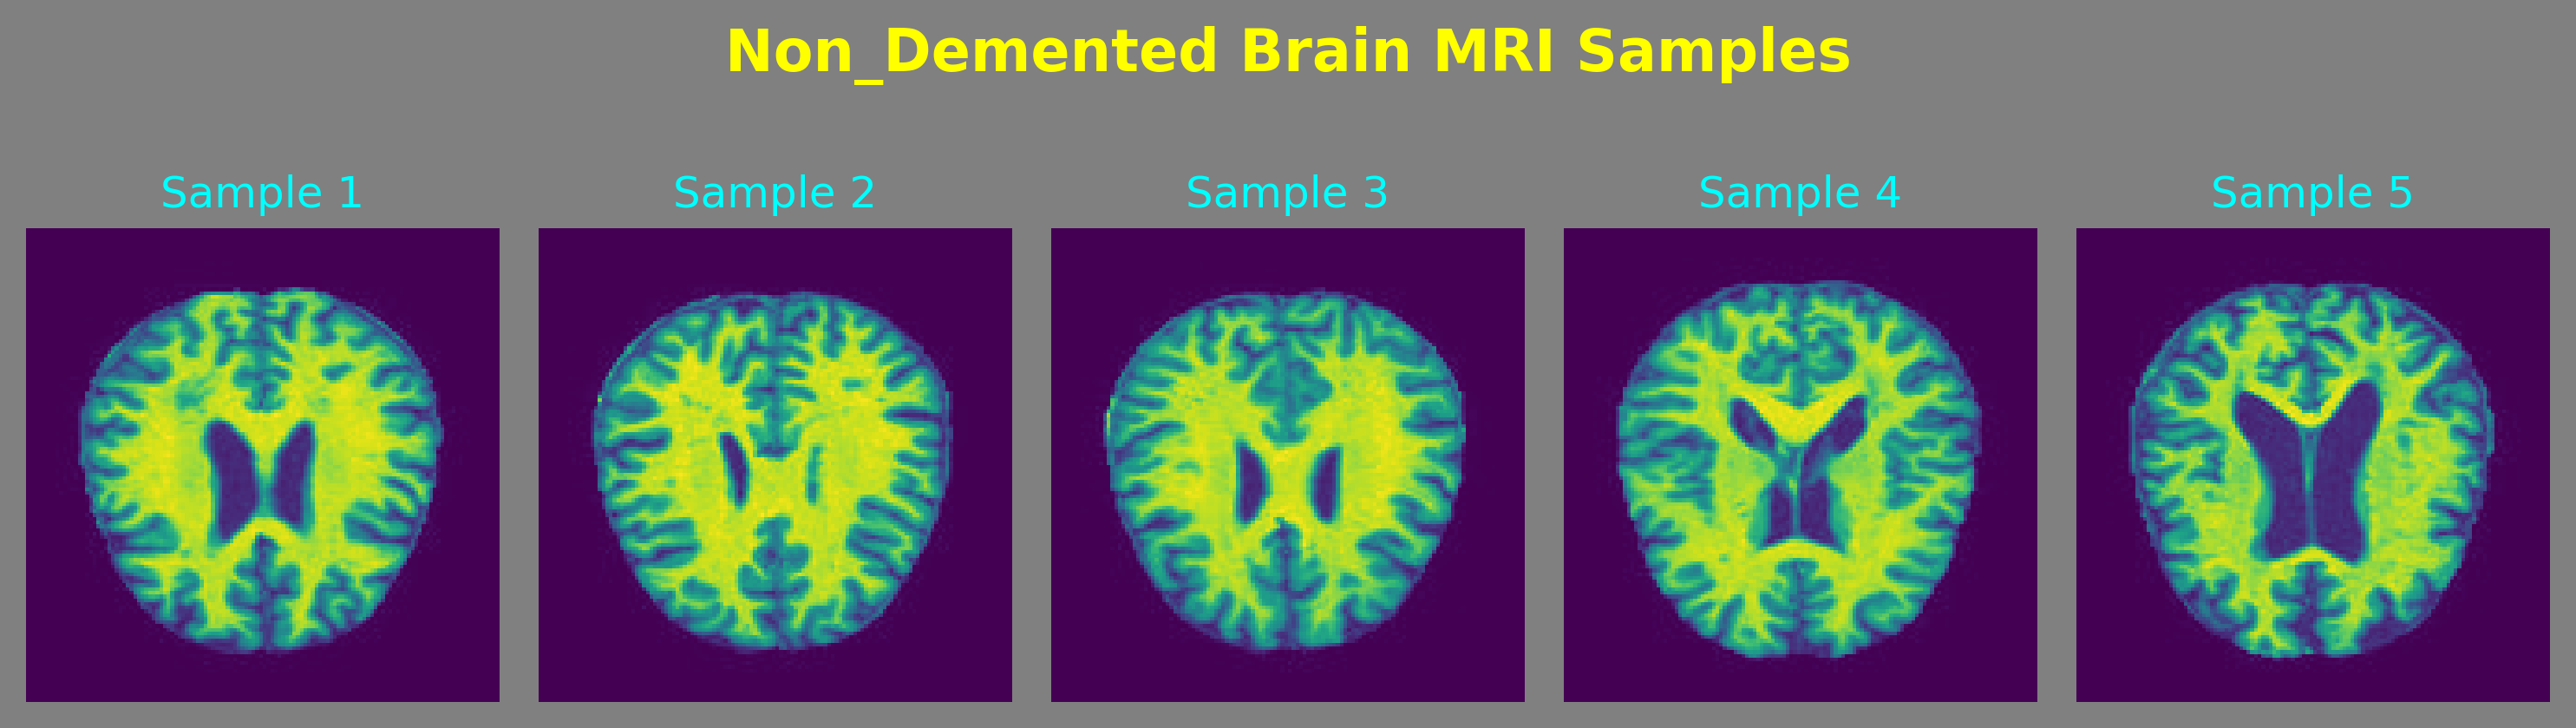

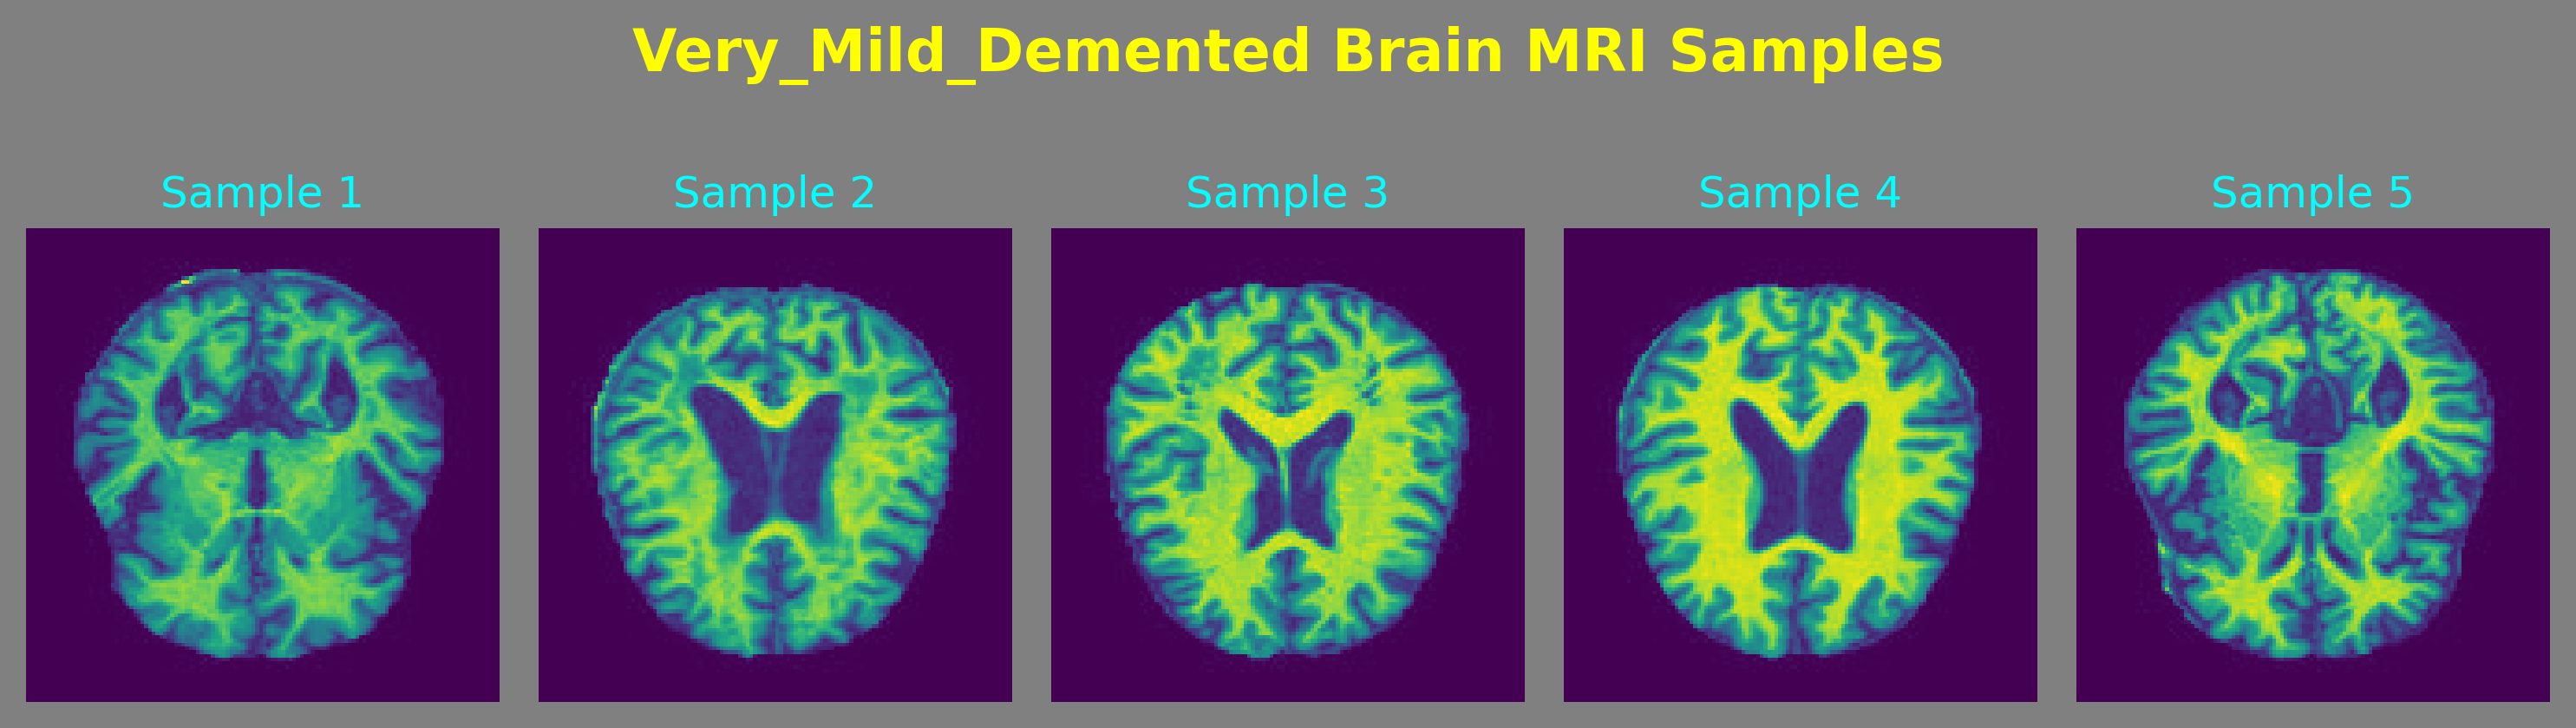

In [ ]:
def sample_bringer(path, target, num_samples=5):

    class_path = os.path.join(path, target)

    image_files = [image for image in os.listdir(class_path) if image.endswith('.jpg')]

    fig, ax = plt.subplots(1, num_samples, facecolor="gray")
    fig.suptitle(f'{target} Brain MRI Samples', color="yellow",fontsize=16, fontweight='bold', y=0.75)

    for i in range(num_samples):
        image_path = os.path.join(class_path, image_files[i])
        img = mpimg.imread(image_path)

        ax[i].imshow(img)
        ax[i].axis('off')
        ax[i].set_title(f'Sample {i+1}', color="aqua")

    plt.tight_layout()

for target in class_names:
    sample_bringer(PATH, target=target)

#Autoencoder

In [ ]:
#Preprocesamiento

In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential(name = 'miprimerAC')
model.add (tf.keras.layers.Input(shape=(128,128, 1)))
model.add (tf.keras.layers.Conv2D(filters= 64, kernel_size= (3,3), padding = 'same', name= 'conv2d1', activation = 'relu'))
model.add (tf.keras.layers.MaxPool2D(pool_size= (2,2), padding = 'same'))
model.add (tf.keras.layers.Conv2D(filters= 32, kernel_size= (3,3), padding = 'same', name= 'conv2d2', activation = 'relu'))
model.add (tf.keras.layers.MaxPool2D(pool_size= (2,2), padding = 'same'))
model.add (tf.keras.layers.Conv2D(filters= 16, kernel_size= (3,3), padding = 'same', name= 'conv2d3', activation = 'relu'))
model.add (tf.keras.layers.MaxPool2D(pool_size= (2,2), padding = 'same'))

model.add (tf.keras.layers.Conv2DTranspose(filters= 16, kernel_size= (3,3), padding = 'same', name= 'conv2d4', activation = 'relu'))
model.add (tf.keras.layers.UpSampling2D(size= (2,2)))
model.add (tf.keras.layers.Conv2DTranspose(filters= 32, kernel_size= (3,3), padding = 'same', name= 'conv2d5', activation = 'relu'))
model.add (tf.keras.layers.UpSampling2D(size= (2,2)))
model.add (tf.keras.layers.Conv2DTranspose(filters=64, kernel_size= (3,3), padding = 'same', name= 'conv2d6', activation = 'relu'))
model.add (tf.keras.layers.UpSampling2D(size= (2,2)))
model.add (tf.keras.layers.Conv2D(filters= 1, kernel_size= (3,3), padding = 'same', name= 'conv2d7', activation = 'relu'))

model.summary()

Model: "miprimerAC"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d1 (Conv2D)            (None, 128, 128, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 64)        0         
 D)                                                              
                                                                 
 conv2d2 (Conv2D)            (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 conv2d3 (Conv2D)            (None, 32, 32, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 16)        0

In [ ]:
model.compile(optimizer='adam', loss= tf.losses.MeanSquaredError())

In [ ]:
X_test = imagenes_np[:10, ...]
X_train = imagenes_np[10:, ...]

In [ ]:
imagenes_np[0].shape

(128, 128, 1)

In [ ]:
model.predict(imagenes_np[0])[:,:,0,0]

4/4 [==============================] - 0s 32ms/step


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

4/4 [==============================] - 0s 26ms/step


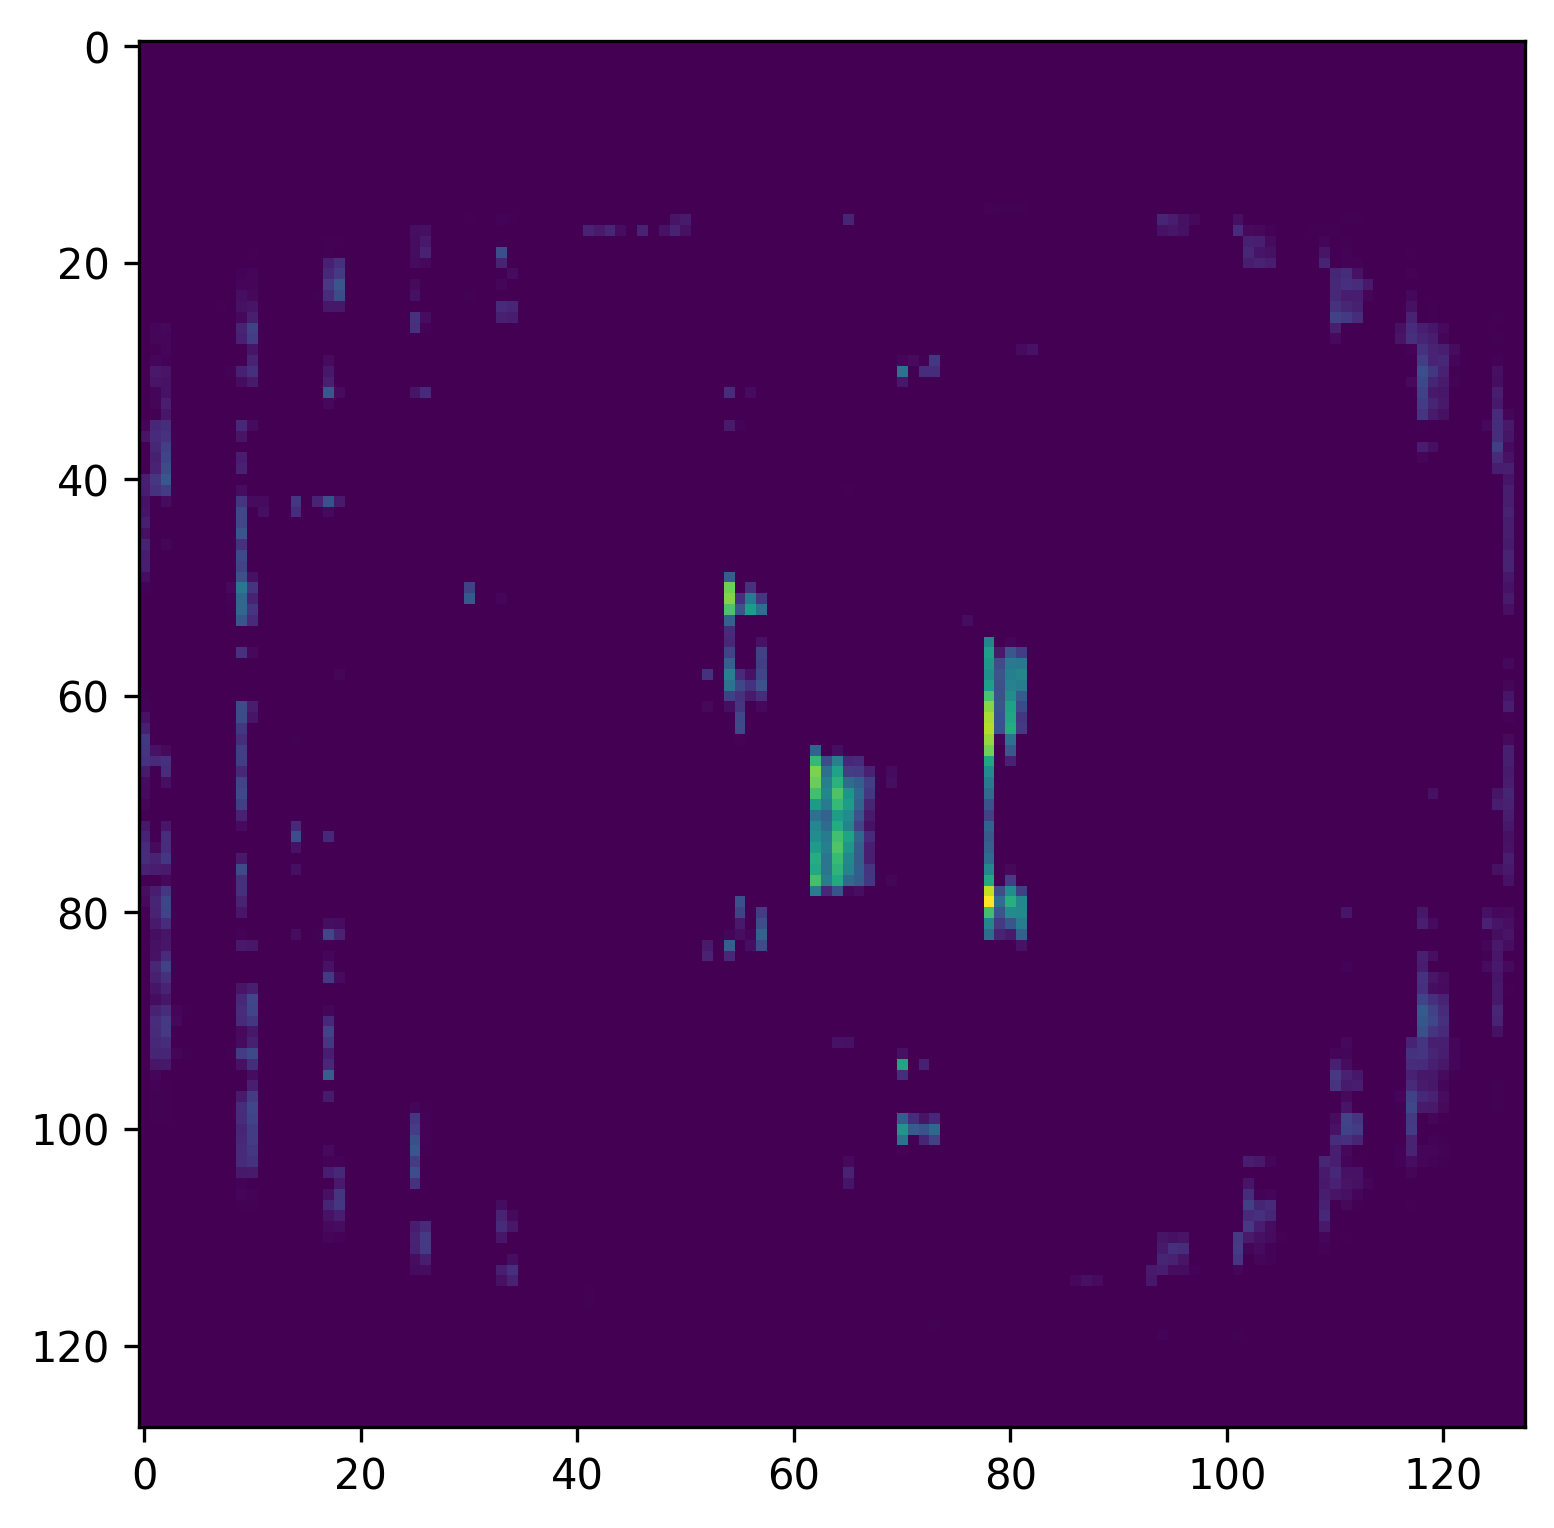

In [ ]:
plt.imshow(model.predict(imagenes_np[0])[:,:,0,0])

In [ ]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.2/404.2 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 10.0 MB/s eta 0:00:00


In [ ]:
#!pip install optuna
import optuna

In [ ]:
EPOCHS = 100
BATCH_SIZE = 10

def create_optimizer(trial):
    kwargs = {}
    kwargs["learning_rate"] = trial.suggest_float("learning_rate", 1e-4, 1e-2, log=True)
    optimizer = getattr(tf.optimizers, 'Adam')(**kwargs)
    return optimizer

def create_model(trial):
  kernel_sizes = [(2,2),(2,3),(3,2),(3,3),(2,4),(4,2),(3,4),(4,3),(4,4)]
  kz_selected = trial.suggest_categorical("kernel_size", kernel_sizes)

  model = tf.keras.models.Sequential(name = 'miprimerAC')
  model.add (tf.keras.layers.Input(shape=(128,128, 1))) #input
  model.add (tf.keras.layers.Conv2D(filters= 64, kernel_size= kz_selected, padding = 'same', name= 'conv2d1', activation = 'relu')) #encoder
  model.add (tf.keras.layers.MaxPool2D(pool_size= (2,2), padding = 'same'))
  model.add (tf.keras.layers.Conv2D(filters= 32, kernel_size= kz_selected, padding = 'same', name= 'conv2d2', activation = 'relu'))
  model.add (tf.keras.layers.MaxPool2D(pool_size= (2,2), padding = 'same'))
  model.add (tf.keras.layers.Conv2D(filters= 16, kernel_size= kz_selected, padding = 'same', name= 'conv2d3', activation = 'relu'))
  model.add (tf.keras.layers.MaxPool2D(pool_size= (2,2), padding = 'same'))

  model.add (tf.keras.layers.Conv2DTranspose(filters= 16, kernel_size= kz_selected, padding = 'same', name= 'conv2d4', activation = 'relu')) #decoder
  model.add (tf.keras.layers.UpSampling2D(size= (2,2)))
  model.add (tf.keras.layers.Conv2DTranspose(filters= 32, kernel_size= kz_selected, padding = 'same', name= 'conv2d5', activation = 'relu'))
  model.add (tf.keras.layers.UpSampling2D(size= (2,2)))
  model.add (tf.keras.layers.Conv2DTranspose(filters=64, kernel_size= kz_selected, padding = 'same', name= 'conv2d6', activation = 'relu'))
  model.add (tf.keras.layers.UpSampling2D(size= (2,2)))
  model.add (tf.keras.layers.Conv2D(filters= 1, kernel_size= kz_selected, padding = 'same', name= 'conv2d7', activation = 'relu'))
  return model


def plot_loss_metric(history, params, _trial_id):
    # Obtener las métricas del entrenamiento y la validación
    train_loss = history.history['loss']
    train_mae = history.history['mean_absolute_error']
    val_loss = history.history['val_loss']
    val_mae = history.history['val_mean_absolute_error']

    # Graficar las métricas
    epochs = range(1, len(train_loss) + 1)

    plt.figure(figsize=(25, 15))
    #kz, lr, a = params['kernel_size'], params['learning_rate']
    default_kz_value = 0.5  # Replace with the actual default value you want to use
    default_lr_value = 0.001  # Replace with the actual default value you want to use
    default_a_value = 1  # Replace with the actual default value you want to use


    kz = params.get('kernel_size', default_kz_value)
    lr = params.get('learning_rate', default_lr_value)
    a = params.get('other_key', default_a_value)
    plt.suptitle(f'trialId:{_trial_id} | kz:{kz} | lr:{lr}', fontsize=20, y=0.98)

    plt.subplot(1, 2, 1)
    plt.plot(epochs, np.log(train_loss), label='Training Loss')
    plt.plot(epochs, np.log(val_loss), label='Validation Loss')
    plt.xlabel('Epoch', fontsize=20)
    plt.ylabel('$log(loss)$', fontsize=20)
    plt.title('Training and Validation Loss', fontsize=20)
    plt.legend(fontsize=15)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.subplot(1, 2, 2)
    plt.plot(epochs, np.log(train_mae), label='Training MAE')
    plt.plot(epochs, np.log(val_mae), label='Validation MAE')
    plt.xlabel('Epoch', fontsize=20)
    plt.ylabel('$log(MAE)$', fontsize=20)
    plt.title(f'Training and Validation MAE', fontsize=20)
    plt.legend(fontsize=15)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.tight_layout()
    plt.savefig(f'id_{_trial_id-1}.png')


def objective(trial):
    model = create_model(trial)
    optimizer = create_optimizer(trial)
    early_stop = EarlyStopping(monitor='val_loss', patience=5, mode='auto', verbose=1)
    model.compile(optimizer=optimizer,loss=tf.keras.losses.MeanSquaredError(), metrics=tf.keras.losses.MeanAbsoluteError())
    history = model.fit(X_train, X_train, validation_data=(X_test, X_test), epochs=EPOCHS, callbacks=[early_stop], verbose=1)
    plot_loss_metric(history, trial.__dict__['_cached_frozen_trial'].params,trial.__dict__['_trial_id'])
    mae = model.evaluate(imagenes_np)[1]
    #mae = model.evaluate(data)[1]
    #mae = model.evaluate(test_ds)[1]
    if np.isnan(mae):
        return np.inf
    return mae


In [ ]:
study = optuna.create_study(study_name=f'optimizing_parameters')
study.optimize(objective, n_trials=100)

[I 2023-10-04 14:13:09,299] A new study created in memory with name: optimizing_parameters


Epoch 1/100
2/2 [==============================] - 18s 6s/step - loss: 8747.9238 - mean_absolute_error: 58.7226 - val_loss: 2533.2583 - val_mean_absolute_error: 39.3196
Epoch 2/100
2/2 [==============================] - 9s 3s/step - loss: 4786.1147 - mean_absolute_error: 55.1398 - val_loss: 3164.7024 - val_mean_absolute_error: 41.5108
Epoch 3/100
2/2 [==============================] - 5s 2s/step - loss: 2711.5161 - mean_absolute_error: 38.5470 - val_loss: 3271.2454 - val_mean_absolute_error: 40.3144
Epoch 4/100
2/2 [==============================] - 6s 3s/step - loss: 3504.9480 - mean_absolute_error: 40.7734 - val_loss: 4367.7720 - val_mean_absolute_error: 43.1379
Epoch 5/100
2/2 [==============================] - 4s 2s/step - loss: 4226.6494 - mean_absolute_error: 42.1264 - val_loss: 3698.9468 - val_mean_absolute_error: 39.7354
Epoch 6/100
2/2 [==============================] - 4s 2s/step - loss: 3332.3811 - mean_absolute_error: 37.6211 - val_loss: 2198.7969 - val_mean_absolute_error:

[I 2023-10-04 14:21:47,702] Trial 0 finished with value: 0.0 and parameters: {'kernel_size': (4, 2), 'learning_rate': 0.001434243987146045}. Best is trial 0 with value: 0.0.


Epoch 1/100
2/2 [==============================] - 13s 5s/step - loss: 11281.5693 - mean_absolute_error: 68.0354 - val_loss: 10071.6230 - val_mean_absolute_error: 64.5446
Epoch 2/100
2/2 [==============================] - 11s 4s/step - loss: 9270.8984 - mean_absolute_error: 61.7628 - val_loss: 6312.9712 - val_mean_absolute_error: 53.3438
Epoch 3/100
2/2 [==============================] - 11s 4s/step - loss: 5233.2432 - mean_absolute_error: 49.5733 - val_loss: 2680.9045 - val_mean_absolute_error: 43.1783
Epoch 4/100
2/2 [==============================] - 11s 5s/step - loss: 3474.6318 - mean_absolute_error: 47.7568 - val_loss: 4342.2246 - val_mean_absolute_error: 50.2752
Epoch 5/100
2/2 [==============================] - 10s 4s/step - loss: 3645.0212 - mean_absolute_error: 45.8046 - val_loss: 2426.1753 - val_mean_absolute_error: 39.8475
Epoch 6/100
2/2 [==============================] - 11s 4s/step - loss: 2463.5510 - mean_absolute_error: 39.3514 - val_loss: 2990.6838 - val_mean_absolute

[I 2023-10-04 14:41:15,458] Trial 1 finished with value: 0.0 and parameters: {'kernel_size': (4, 4), 'learning_rate': 0.00041935909691871996}. Best is trial 0 with value: 0.0.


Epoch 1/100
2/2 [==============================] - 7s 3s/step - loss: 9315.1084 - mean_absolute_error: 65.1990 - val_loss: 9464.3486 - val_mean_absolute_error: 63.8220
Epoch 2/100
2/2 [==============================] - 8s 3s/step - loss: 9687.2549 - mean_absolute_error: 64.1942 - val_loss: 9973.4395 - val_mean_absolute_error: 64.1156
Epoch 3/100
2/2 [==============================] - 6s 2s/step - loss: 9255.4209 - mean_absolute_error: 61.5697 - val_loss: 5298.2852 - val_mean_absolute_error: 49.7824
Epoch 4/100
2/2 [==============================] - 7s 4s/step - loss: 4219.4966 - mean_absolute_error: 45.4916 - val_loss: 5411.9062 - val_mean_absolute_error: 54.9224
Epoch 5/100
2/2 [==============================] - 6s 3s/step - loss: 4130.6465 - mean_absolute_error: 46.4770 - val_loss: 3661.0469 - val_mean_absolute_error: 42.4687
Epoch 6/100
2/2 [==============================] - 6s 3s/step - loss: 3845.1609 - mean_absolute_error: 42.7166 - val_loss: 3944.7532 - val_mean_absolute_error: 

[I 2023-10-04 14:52:41,935] Trial 2 finished with value: 0.0 and parameters: {'kernel_size': (4, 3), 'learning_rate': 0.003579245589289399}. Best is trial 0 with value: 0.0.


Epoch 1/100
2/2 [==============================] - 8s 2s/step - loss: 9436.7080 - mean_absolute_error: 61.1484 - val_loss: 11686.1191 - val_mean_absolute_error: 86.3714
Epoch 2/100
2/2 [==============================] - 4s 2s/step - loss: 8305.4395 - mean_absolute_error: 65.2420 - val_loss: 6973.3545 - val_mean_absolute_error: 54.3822
Epoch 3/100
2/2 [==============================] - 5s 2s/step - loss: 7439.9521 - mean_absolute_error: 56.4033 - val_loss: 8818.3340 - val_mean_absolute_error: 60.0381
Epoch 4/100
2/2 [==============================] - 5s 2s/step - loss: 8662.0342 - mean_absolute_error: 59.3316 - val_loss: 8342.8193 - val_mean_absolute_error: 58.1892
Epoch 5/100
2/2 [==============================] - 4s 2s/step - loss: 7864.0718 - mean_absolute_error: 56.4476 - val_loss: 6072.6748 - val_mean_absolute_error: 50.4258
Epoch 6/100
2/2 [==============================] - 4s 2s/step - loss: 5147.3335 - mean_absolute_error: 46.7389 - val_loss: 2376.3994 - val_mean_absolute_error:

[I 2023-10-04 15:01:10,140] Trial 3 finished with value: 0.0 and parameters: {'kernel_size': (2, 4), 'learning_rate': 0.0035393514894258753}. Best is trial 0 with value: 0.0.


Epoch 1/100
2/2 [==============================] - 13s 6s/step - loss: 7747.0884 - mean_absolute_error: 56.0945 - val_loss: 5506.4546 - val_mean_absolute_error: 49.8670
Epoch 2/100
2/2 [==============================] - 10s 4s/step - loss: 6338.4238 - mean_absolute_error: 59.1522 - val_loss: 3959.8621 - val_mean_absolute_error: 42.7731
Epoch 3/100
2/2 [==============================] - 11s 4s/step - loss: 5126.6846 - mean_absolute_error: 47.5273 - val_loss: 7817.3389 - val_mean_absolute_error: 55.8324
Epoch 4/100
2/2 [==============================] - 11s 5s/step - loss: 7660.2383 - mean_absolute_error: 55.1067 - val_loss: 6964.4297 - val_mean_absolute_error: 52.9520
Epoch 5/100
2/2 [==============================] - 10s 5s/step - loss: 6253.0718 - mean_absolute_error: 50.2759 - val_loss: 3372.2905 - val_mean_absolute_error: 40.8622
Epoch 6/100
2/2 [==============================] - 11s 4s/step - loss: 2837.7729 - mean_absolute_error: 38.0663 - val_loss: 5406.7168 - val_mean_absolute_e

[I 2023-10-04 15:18:36,588] Trial 4 finished with value: 0.0 and parameters: {'kernel_size': (4, 4), 'learning_rate': 0.0024360545053251008}. Best is trial 0 with value: 0.0.


Epoch 1/100
2/2 [==============================] - 8s 3s/step - loss: 9111.0400 - mean_absolute_error: 60.8710 - val_loss: 273557.5625 - val_mean_absolute_error: 432.6704
Epoch 2/100
2/2 [==============================] - 7s 3s/step - loss: 163011.2344 - mean_absolute_error: 235.9243 - val_loss: 11509.6133 - val_mean_absolute_error: 68.6445
Epoch 3/100
2/2 [==============================] - 6s 3s/step - loss: 11376.3438 - mean_absolute_error: 68.6399 - val_loss: 11601.0176 - val_mean_absolute_error: 68.9065
Epoch 4/100
2/2 [==============================] - 8s 3s/step - loss: 11426.3359 - mean_absolute_error: 68.4455 - val_loss: 11601.0176 - val_mean_absolute_error: 68.9065
Epoch 5/100
2/2 [==============================] - 6s 2s/step - loss: 11426.3359 - mean_absolute_error: 68.4115 - val_loss: 11601.0176 - val_mean_absolute_error: 68.9065
Epoch 6/100
2/2 [==============================] - 7s 4s/step - loss: 11426.3359 - mean_absolute_error: 68.4485 - val_loss: 11601.0176 - val_mean_a

[I 2023-10-04 15:20:02,991] Trial 5 finished with value: 0.0 and parameters: {'kernel_size': (3, 4), 'learning_rate': 0.0042718007350538555}. Best is trial 0 with value: 0.0.


Epoch 1/100
2/2 [==============================] - 8s 4s/step - loss: 8325.5625 - mean_absolute_error: 57.5631 - val_loss: 10654.9082 - val_mean_absolute_error: 66.0925
Epoch 2/100
2/2 [==============================] - 7s 3s/step - loss: 10629.0010 - mean_absolute_error: 66.0960 - val_loss: 10888.7520 - val_mean_absolute_error: 66.5983
Epoch 3/100
2/2 [==============================] - 6s 3s/step - loss: 10582.5234 - mean_absolute_error: 65.5589 - val_loss: 9801.1426 - val_mean_absolute_error: 63.2724
Epoch 4/100
2/2 [==============================] - 8s 3s/step - loss: 8983.5039 - mean_absolute_error: 60.3680 - val_loss: 4781.5444 - val_mean_absolute_error: 47.1363
Epoch 5/100
2/2 [==============================] - 6s 2s/step - loss: 3984.4526 - mean_absolute_error: 43.9770 - val_loss: 6025.5366 - val_mean_absolute_error: 57.7379
Epoch 6/100
2/2 [==============================] - 8s 4s/step - loss: 4348.2207 - mean_absolute_error: 45.9018 - val_loss: 4005.9702 - val_mean_absolute_err

[I 2023-10-04 15:30:57,975] Trial 6 finished with value: 0.0 and parameters: {'kernel_size': (4, 3), 'learning_rate': 0.00448117141479572}. Best is trial 0 with value: 0.0.


Epoch 1/100
2/2 [==============================] - 7s 2s/step - loss: 11052.3262 - mean_absolute_error: 67.0897 - val_loss: 9454.8301 - val_mean_absolute_error: 62.5125
Epoch 2/100
2/2 [==============================] - 4s 2s/step - loss: 8665.7451 - mean_absolute_error: 59.6365 - val_loss: 5972.1963 - val_mean_absolute_error: 51.1180
Epoch 3/100
2/2 [==============================] - 5s 2s/step - loss: 5095.1089 - mean_absolute_error: 47.8649 - val_loss: 2674.4482 - val_mean_absolute_error: 40.7023
Epoch 4/100
2/2 [==============================] - 5s 2s/step - loss: 2707.6997 - mean_absolute_error: 40.7196 - val_loss: 4267.2002 - val_mean_absolute_error: 48.0666
Epoch 5/100
2/2 [==============================] - 4s 2s/step - loss: 4062.7283 - mean_absolute_error: 46.7601 - val_loss: 3227.8066 - val_mean_absolute_error: 42.7563
Epoch 6/100
2/2 [==============================] - 4s 2s/step - loss: 2845.6030 - mean_absolute_error: 40.5295 - val_loss: 2391.7917 - val_mean_absolute_error:

[I 2023-10-04 15:39:26,974] Trial 7 finished with value: 0.0 and parameters: {'kernel_size': (2, 4), 'learning_rate': 0.0006053821252467183}. Best is trial 0 with value: 0.0.


Epoch 1/100
2/2 [==============================] - 5s 2s/step - loss: 23631.6348 - mean_absolute_error: 117.2786 - val_loss: 8074.8960 - val_mean_absolute_error: 57.3340
Epoch 2/100
2/2 [==============================] - 3s 1s/step - loss: 9156.3916 - mean_absolute_error: 61.8444 - val_loss: 11518.3145 - val_mean_absolute_error: 68.6283
Epoch 3/100
2/2 [==============================] - 5s 2s/step - loss: 11377.9102 - mean_absolute_error: 68.5213 - val_loss: 11600.0674 - val_mean_absolute_error: 68.9038
Epoch 4/100
2/2 [==============================] - 4s 1s/step - loss: 11425.0322 - mean_absolute_error: 68.5118 - val_loss: 11597.6221 - val_mean_absolute_error: 68.9029
Epoch 5/100
2/2 [==============================] - 3s 1s/step - loss: 11422.4141 - mean_absolute_error: 68.3589 - val_loss: 11595.1094 - val_mean_absolute_error: 68.9020
Epoch 6/100
2/2 [==============================] - 3s 1s/step - loss: 11419.9678 - mean_absolute_error: 68.5919 - val_loss: 11592.6377 - val_mean_absol

[I 2023-10-04 15:40:12,407] Trial 8 finished with value: 0.0 and parameters: {'kernel_size': (3, 2), 'learning_rate': 0.008743319127755838}. Best is trial 0 with value: 0.0.


Epoch 1/100
2/2 [==============================] - 9s 4s/step - loss: 155598.5938 - mean_absolute_error: 287.4460 - val_loss: 6420.2227 - val_mean_absolute_error: 52.9660
Epoch 2/100
2/2 [==============================] - 7s 3s/step - loss: 8134.1494 - mean_absolute_error: 59.5244 - val_loss: 11154.2520 - val_mean_absolute_error: 67.4999
Epoch 3/100
2/2 [==============================] - 6s 3s/step - loss: 10897.7109 - mean_absolute_error: 66.5196 - val_loss: 10493.2158 - val_mean_absolute_error: 65.4168
Epoch 4/100
2/2 [==============================] - 8s 3s/step - loss: 10075.4121 - mean_absolute_error: 64.2303 - val_loss: 8854.8926 - val_mean_absolute_error: 60.4870
Epoch 5/100
2/2 [==============================] - 6s 3s/step - loss: 8097.4976 - mean_absolute_error: 57.5905 - val_loss: 5045.6377 - val_mean_absolute_error: 49.0858
Epoch 6/100
2/2 [==============================] - 7s 4s/step - loss: 4140.5127 - mean_absolute_error: 45.7125 - val_loss: 5448.1719 - val_mean_absolute_

[I 2023-10-04 15:51:39,498] Trial 9 finished with value: 0.0 and parameters: {'kernel_size': (3, 4), 'learning_rate': 0.004911234516214568}. Best is trial 0 with value: 0.0.


Epoch 1/100
2/2 [==============================] - 7s 3s/step - loss: 11342.4912 - mean_absolute_error: 68.3193 - val_loss: 11212.4316 - val_mean_absolute_error: 67.7789
Epoch 2/100
2/2 [==============================] - 6s 2s/step - loss: 10942.6045 - mean_absolute_error: 66.9280 - val_loss: 10688.6562 - val_mean_absolute_error: 66.1939
Epoch 3/100
2/2 [==============================] - 4s 2s/step - loss: 10407.4766 - mean_absolute_error: 65.1563 - val_loss: 10045.5879 - val_mean_absolute_error: 64.2765
Epoch 4/100
2/2 [==============================] - 5s 2s/step - loss: 9748.3691 - mean_absolute_error: 63.1064 - val_loss: 9258.4629 - val_mean_absolute_error: 61.8562
Epoch 5/100
2/2 [==============================] - 6s 2s/step - loss: 8937.0576 - mean_absolute_error: 60.7779 - val_loss: 8313.6553 - val_mean_absolute_error: 58.7949
Epoch 6/100
2/2 [==============================] - 4s 2s/step - loss: 7973.1899 - mean_absolute_error: 57.6158 - val_loss: 7209.8018 - val_mean_absolute_e

[I 2023-10-04 16:00:05,994] Trial 10 finished with value: 0.0 and parameters: {'kernel_size': (4, 2), 'learning_rate': 0.0001487586403529323}. Best is trial 0 with value: 0.0.


Epoch 1/100
2/2 [==============================] - 7s 3s/step - loss: 10939.4756 - mean_absolute_error: 66.9111 - val_loss: 9470.7256 - val_mean_absolute_error: 62.8880
Epoch 2/100
2/2 [==============================] - 5s 2s/step - loss: 8658.1074 - mean_absolute_error: 60.0216 - val_loss: 5820.5195 - val_mean_absolute_error: 51.6342
Epoch 3/100
2/2 [==============================] - 4s 2s/step - loss: 4894.2085 - mean_absolute_error: 48.1024 - val_loss: 2931.9761 - val_mean_absolute_error: 42.9124
Epoch 4/100
2/2 [==============================] - 5s 3s/step - loss: 3448.7119 - mean_absolute_error: 45.2224 - val_loss: 4607.9897 - val_mean_absolute_error: 49.5230
Epoch 5/100
2/2 [==============================] - 5s 2s/step - loss: 4023.0295 - mean_absolute_error: 46.0241 - val_loss: 2777.7161 - val_mean_absolute_error: 40.8987
Epoch 6/100
2/2 [==============================] - 4s 2s/step - loss: 2640.2927 - mean_absolute_error: 39.7375 - val_loss: 2878.5303 - val_mean_absolute_error:

[I 2023-10-04 16:08:32,429] Trial 11 finished with value: 0.0 and parameters: {'kernel_size': (4, 2), 'learning_rate': 0.0007807440421324672}. Best is trial 0 with value: 0.0.


Epoch 1/100
2/2 [==============================] - 13s 4s/step - loss: 10785.9170 - mean_absolute_error: 66.2374 - val_loss: 8438.8340 - val_mean_absolute_error: 59.7484
Epoch 2/100
2/2 [==============================] - 12s 5s/step - loss: 7380.0352 - mean_absolute_error: 56.3320 - val_loss: 3973.0125 - val_mean_absolute_error: 47.8236
Epoch 3/100
2/2 [==============================] - 10s 5s/step - loss: 3631.6853 - mean_absolute_error: 46.6577 - val_loss: 5114.2148 - val_mean_absolute_error: 54.6252
Epoch 4/100
2/2 [==============================] - 11s 4s/step - loss: 4680.0674 - mean_absolute_error: 51.9023 - val_loss: 3302.3418 - val_mean_absolute_error: 46.1057
Epoch 5/100
2/2 [==============================] - 12s 5s/step - loss: 3042.2466 - mean_absolute_error: 44.1926 - val_loss: 3167.1914 - val_mean_absolute_error: 44.0441
Epoch 6/100
2/2 [==============================] - 11s 6s/step - loss: 3193.8735 - mean_absolute_error: 43.5387 - val_loss: 3407.8586 - val_mean_absolute_

[I 2023-10-04 16:27:08,465] Trial 12 finished with value: 0.0 and parameters: {'kernel_size': (4, 4), 'learning_rate': 0.00042557716996364896}. Best is trial 0 with value: 0.0.


Epoch 1/100
2/2 [==============================] - 5s 2s/step - loss: 10982.5420 - mean_absolute_error: 67.1423 - val_loss: 9165.6230 - val_mean_absolute_error: 61.7159
Epoch 2/100
2/2 [==============================] - 5s 2s/step - loss: 8230.7803 - mean_absolute_error: 57.9082 - val_loss: 4750.6953 - val_mean_absolute_error: 47.1419
Epoch 3/100
2/2 [==============================] - 4s 1s/step - loss: 3894.8403 - mean_absolute_error: 43.3419 - val_loss: 3444.7515 - val_mean_absolute_error: 42.8743
Epoch 4/100
2/2 [==============================] - 3s 1s/step - loss: 3693.3340 - mean_absolute_error: 44.1760 - val_loss: 3324.9038 - val_mean_absolute_error: 41.8033
Epoch 5/100
2/2 [==============================] - 3s 1s/step - loss: 2850.8550 - mean_absolute_error: 38.9747 - val_loss: 2315.6755 - val_mean_absolute_error: 37.0181
Epoch 6/100
2/2 [==============================] - 5s 2s/step - loss: 2394.1890 - mean_absolute_error: 36.9386 - val_loss: 2898.7739 - val_mean_absolute_error:

[I 2023-10-04 16:33:33,984] Trial 13 finished with value: 0.0 and parameters: {'kernel_size': (2, 3), 'learning_rate': 0.0010902909699749945}. Best is trial 0 with value: 0.0.


Epoch 1/100
2/2 [==============================] - 5s 2s/step - loss: 10880.5703 - mean_absolute_error: 66.2863 - val_loss: 8531.9590 - val_mean_absolute_error: 58.9833
Epoch 2/100
2/2 [==============================] - 4s 2s/step - loss: 7428.6758 - mean_absolute_error: 54.5924 - val_loss: 3573.4714 - val_mean_absolute_error: 42.0964
Epoch 3/100
2/2 [==============================] - 3s 1s/step - loss: 3149.4653 - mean_absolute_error: 39.5372 - val_loss: 4806.7065 - val_mean_absolute_error: 47.2211
Epoch 4/100
2/2 [==============================] - 3s 1s/step - loss: 4484.1226 - mean_absolute_error: 45.2748 - val_loss: 3096.1799 - val_mean_absolute_error: 39.2080
Epoch 5/100
2/2 [==============================] - 3s 1s/step - loss: 2770.1741 - mean_absolute_error: 37.3662 - val_loss: 2640.6316 - val_mean_absolute_error: 37.8487
Epoch 6/100
2/2 [==============================] - 3s 2s/step - loss: 2728.4141 - mean_absolute_error: 37.9715 - val_loss: 3263.7705 - val_mean_absolute_error:

[I 2023-10-04 16:39:00,414] Trial 14 finished with value: 0.0 and parameters: {'kernel_size': (2, 2), 'learning_rate': 0.0013683875624961887}. Best is trial 0 with value: 0.0.


Epoch 1/100
2/2 [==============================] - 6s 2s/step - loss: 11398.2314 - mean_absolute_error: 68.5395 - val_loss: 11048.9248 - val_mean_absolute_error: 67.3743
Epoch 2/100
2/2 [==============================] - 6s 3s/step - loss: 10592.0166 - mean_absolute_error: 65.9651 - val_loss: 9510.3730 - val_mean_absolute_error: 62.7841
Epoch 3/100
2/2 [==============================] - 4s 2s/step - loss: 8943.5381 - mean_absolute_error: 60.7550 - val_loss: 7171.4570 - val_mean_absolute_error: 55.3589
Epoch 4/100
2/2 [==============================] - 4s 2s/step - loss: 6507.5464 - mean_absolute_error: 52.7821 - val_loss: 4390.7598 - val_mean_absolute_error: 46.9977
Epoch 5/100
2/2 [==============================] - 6s 3s/step - loss: 3833.8999 - mean_absolute_error: 44.7726 - val_loss: 2703.9595 - val_mean_absolute_error: 42.1310
Epoch 6/100
2/2 [==============================] - 4s 2s/step - loss: 2830.7385 - mean_absolute_error: 42.5651 - val_loss: 4138.7603 - val_mean_absolute_erro

[I 2023-10-04 16:48:26,899] Trial 15 finished with value: 0.0 and parameters: {'kernel_size': (3, 3), 'learning_rate': 0.0003598825441826591}. Best is trial 0 with value: 0.0.


Epoch 1/100
2/2 [==============================] - 8s 3s/step - loss: 10329.4893 - mean_absolute_error: 64.1240 - val_loss: 4917.3687 - val_mean_absolute_error: 48.4380
Epoch 2/100
2/2 [==============================] - 5s 2s/step - loss: 4365.6748 - mean_absolute_error: 46.4453 - val_loss: 3675.2563 - val_mean_absolute_error: 44.8596
Epoch 3/100
2/2 [==============================] - 4s 2s/step - loss: 3147.0283 - mean_absolute_error: 41.7046 - val_loss: 2852.5396 - val_mean_absolute_error: 39.3746
Epoch 4/100
2/2 [==============================] - 5s 3s/step - loss: 2826.2307 - mean_absolute_error: 38.4050 - val_loss: 2448.8730 - val_mean_absolute_error: 35.3668
Epoch 5/100
2/2 [==============================] - 5s 2s/step - loss: 2191.2556 - mean_absolute_error: 33.1132 - val_loss: 2033.7893 - val_mean_absolute_error: 30.2256
Epoch 6/100
2/2 [==============================] - 4s 2s/step - loss: 1891.3646 - mean_absolute_error: 28.3891 - val_loss: 1615.6243 - val_mean_absolute_error:

[I 2023-10-04 16:56:54,243] Trial 16 finished with value: 0.0 and parameters: {'kernel_size': (4, 2), 'learning_rate': 0.0016756283740768944}. Best is trial 0 with value: 0.0.


Epoch 1/100
2/2 [==============================] - 13s 5s/step - loss: 11212.1064 - mean_absolute_error: 67.8509 - val_loss: 10845.5361 - val_mean_absolute_error: 66.8463
Epoch 2/100
2/2 [==============================] - 11s 5s/step - loss: 10533.1943 - mean_absolute_error: 66.0553 - val_loss: 9985.8857 - val_mean_absolute_error: 64.6060
Epoch 3/100
2/2 [==============================] - 11s 4s/step - loss: 9592.5225 - mean_absolute_error: 63.4097 - val_loss: 8622.6875 - val_mean_absolute_error: 60.8007
Epoch 4/100
2/2 [==============================] - 11s 5s/step - loss: 8152.5337 - mean_absolute_error: 58.8564 - val_loss: 6674.7109 - val_mean_absolute_error: 55.2618
Epoch 5/100
2/2 [==============================] - 11s 6s/step - loss: 6100.4292 - mean_absolute_error: 53.4588 - val_loss: 4351.0127 - val_mean_absolute_error: 49.2534
Epoch 6/100
2/2 [==============================] - 10s 4s/step - loss: 3900.1736 - mean_absolute_error: 47.4798 - val_loss: 3035.5474 - val_mean_absolut

[I 2023-10-04 17:15:28,076] Trial 17 finished with value: 0.0 and parameters: {'kernel_size': (4, 4), 'learning_rate': 0.00021970349727723823}. Best is trial 0 with value: 0.0.


Epoch 1/100
2/2 [==============================] - 4s 1s/step - loss: 11366.9492 - mean_absolute_error: 68.1678 - val_loss: 11137.4238 - val_mean_absolute_error: 67.5162
Epoch 2/100
2/2 [==============================] - 3s 2s/step - loss: 10749.5400 - mean_absolute_error: 66.1573 - val_loss: 9818.1309 - val_mean_absolute_error: 63.3233
Epoch 3/100
2/2 [==============================] - 4s 2s/step - loss: 9281.0615 - mean_absolute_error: 61.4488 - val_loss: 7767.0049 - val_mean_absolute_error: 56.2395
Epoch 4/100
2/2 [==============================] - 3s 1s/step - loss: 7174.6304 - mean_absolute_error: 53.6020 - val_loss: 5231.9932 - val_mean_absolute_error: 47.5914
Epoch 5/100
2/2 [==============================] - 3s 1s/step - loss: 4617.7651 - mean_absolute_error: 45.0659 - val_loss: 2921.4375 - val_mean_absolute_error: 39.4528
Epoch 6/100
2/2 [==============================] - 3s 1s/step - loss: 2669.6580 - mean_absolute_error: 37.8772 - val_loss: 2881.2527 - val_mean_absolute_erro

[I 2023-10-04 17:20:54,714] Trial 18 finished with value: 0.0 and parameters: {'kernel_size': (2, 2), 'learning_rate': 0.0008511950918655368}. Best is trial 0 with value: 0.0.


Epoch 1/100
2/2 [==============================] - 8s 2s/step - loss: 11426.0850 - mean_absolute_error: 68.4338 - val_loss: 11597.1641 - val_mean_absolute_error: 68.9565
Epoch 2/100
2/2 [==============================] - 5s 2s/step - loss: 11416.2637 - mean_absolute_error: 68.8048 - val_loss: 11533.1260 - val_mean_absolute_error: 68.7770
Epoch 3/100
2/2 [==============================] - 6s 3s/step - loss: 11326.5898 - mean_absolute_error: 67.9432 - val_loss: 11315.7324 - val_mean_absolute_error: 68.0844
Epoch 4/100
2/2 [==============================] - 5s 2s/step - loss: 11086.4463 - mean_absolute_error: 67.6992 - val_loss: 10988.3828 - val_mean_absolute_error: 67.0701
Epoch 5/100
2/2 [==============================] - 4s 2s/step - loss: 10746.3076 - mean_absolute_error: 66.2904 - val_loss: 10536.3643 - val_mean_absolute_error: 65.6818
Epoch 6/100
2/2 [==============================] - 5s 3s/step - loss: 10269.2012 - mean_absolute_error: 64.9650 - val_loss: 9940.5264 - val_mean_absol

[I 2023-10-04 17:23:22,018] Trial 19 finished with value: 0.0 and parameters: {'kernel_size': (3, 3), 'learning_rate': 0.0001231480205760187}. Best is trial 0 with value: 0.0.


Epoch 1/100
2/2 [==============================] - 7s 2s/step - loss: 11400.2520 - mean_absolute_error: 68.4244 - val_loss: 11340.1455 - val_mean_absolute_error: 68.1165
Epoch 2/100
2/2 [==============================] - 3s 2s/step - loss: 11081.5068 - mean_absolute_error: 67.3094 - val_loss: 10800.7100 - val_mean_absolute_error: 66.5176
Epoch 3/100
2/2 [==============================] - 4s 2s/step - loss: 10488.0537 - mean_absolute_error: 65.6769 - val_loss: 9974.8867 - val_mean_absolute_error: 64.0617
Epoch 4/100
2/2 [==============================] - 5s 2s/step - loss: 9596.7568 - mean_absolute_error: 62.6402 - val_loss: 8660.7168 - val_mean_absolute_error: 59.9004
Epoch 5/100
2/2 [==============================] - 4s 1s/step - loss: 8181.1865 - mean_absolute_error: 58.1702 - val_loss: 6829.8843 - val_mean_absolute_error: 53.8267
Epoch 6/100
2/2 [==============================] - 3s 1s/step - loss: 6297.4785 - mean_absolute_error: 51.8510 - val_loss: 4657.9951 - val_mean_absolute_er

[I 2023-10-04 17:30:49,170] Trial 20 finished with value: 0.0 and parameters: {'kernel_size': (3, 2), 'learning_rate': 0.0005054941052958958}. Best is trial 0 with value: 0.0.


Epoch 1/100
2/2 [==============================] - 8s 4s/step - loss: 9180.2627 - mean_absolute_error: 60.4657 - val_loss: 4872.7222 - val_mean_absolute_error: 53.4388
Epoch 2/100
2/2 [==============================] - 7s 3s/step - loss: 3942.7686 - mean_absolute_error: 47.5136 - val_loss: 3421.8875 - val_mean_absolute_error: 43.3239
Epoch 3/100
2/2 [==============================] - 6s 3s/step - loss: 3187.8796 - mean_absolute_error: 41.7974 - val_loss: 2331.2693 - val_mean_absolute_error: 38.2188
Epoch 4/100
2/2 [==============================] - 8s 3s/step - loss: 2329.3196 - mean_absolute_error: 37.4824 - val_loss: 2273.3972 - val_mean_absolute_error: 35.4086
Epoch 5/100
2/2 [==============================] - 6s 3s/step - loss: 2136.8262 - mean_absolute_error: 33.6799 - val_loss: 2070.8816 - val_mean_absolute_error: 31.8953
Epoch 6/100
2/2 [==============================] - 7s 4s/step - loss: 1902.4557 - mean_absolute_error: 30.1847 - val_loss: 1894.8660 - val_mean_absolute_error: 

[I 2023-10-04 17:42:17,158] Trial 21 finished with value: 0.0 and parameters: {'kernel_size': (4, 3), 'learning_rate': 0.001975450071015552}. Best is trial 0 with value: 0.0.


Epoch 1/100
2/2 [==============================] - 7s 3s/step - loss: 10237.3203 - mean_absolute_error: 64.4355 - val_loss: 5183.6006 - val_mean_absolute_error: 50.0779
Epoch 2/100
2/2 [==============================] - 8s 3s/step - loss: 4281.7427 - mean_absolute_error: 47.1918 - val_loss: 4439.6514 - val_mean_absolute_error: 51.1352
Epoch 3/100
2/2 [==============================] - 6s 3s/step - loss: 3606.2847 - mean_absolute_error: 46.2762 - val_loss: 2907.9949 - val_mean_absolute_error: 42.5849
Epoch 4/100
2/2 [==============================] - 7s 4s/step - loss: 2981.0127 - mean_absolute_error: 42.3142 - val_loss: 3148.3794 - val_mean_absolute_error: 42.2836
Epoch 5/100
2/2 [==============================] - 6s 2s/step - loss: 2898.9736 - mean_absolute_error: 40.6263 - val_loss: 2337.4680 - val_mean_absolute_error: 38.3864
Epoch 6/100
2/2 [==============================] - 6s 2s/step - loss: 2297.8469 - mean_absolute_error: 37.4349 - val_loss: 2547.4282 - val_mean_absolute_error:

[I 2023-10-04 17:53:43,654] Trial 22 finished with value: 0.0 and parameters: {'kernel_size': (4, 3), 'learning_rate': 0.0012176099987932262}. Best is trial 0 with value: 0.0.


Epoch 1/100
2/2 [==============================] - 6s 2s/step - loss: 10015.1494 - mean_absolute_error: 63.0314 - val_loss: 3741.1570 - val_mean_absolute_error: 43.6298
Epoch 2/100
2/2 [==============================] - 5s 2s/step - loss: 4393.7822 - mean_absolute_error: 48.3838 - val_loss: 2850.8823 - val_mean_absolute_error: 40.1307
Epoch 3/100
2/2 [==============================] - 4s 1s/step - loss: 2678.0120 - mean_absolute_error: 38.8329 - val_loss: 3347.2007 - val_mean_absolute_error: 40.9761
Epoch 4/100
2/2 [==============================] - 3s 1s/step - loss: 3322.4248 - mean_absolute_error: 40.3257 - val_loss: 3052.8188 - val_mean_absolute_error: 38.7855
Epoch 5/100
2/2 [==============================] - 3s 1s/step - loss: 2716.4485 - mean_absolute_error: 36.5132 - val_loss: 2013.6168 - val_mean_absolute_error: 32.5889
Epoch 6/100
2/2 [==============================] - 5s 3s/step - loss: 2033.2939 - mean_absolute_error: 31.5691 - val_loss: 2120.3774 - val_mean_absolute_error:

[I 2023-10-04 18:01:11,355] Trial 23 finished with value: 0.0 and parameters: {'kernel_size': (2, 3), 'learning_rate': 0.002685589200774099}. Best is trial 0 with value: 0.0.


Epoch 1/100
2/2 [==============================] - 9s 3s/step - loss: 11345.0762 - mean_absolute_error: 68.2689 - val_loss: 10872.2402 - val_mean_absolute_error: 66.8089
Epoch 2/100
2/2 [==============================] - 6s 2s/step - loss: 10420.3311 - mean_absolute_error: 65.2772 - val_loss: 9197.5068 - val_mean_absolute_error: 61.8356
Epoch 3/100
2/2 [==============================] - 8s 3s/step - loss: 8596.9766 - mean_absolute_error: 59.4596 - val_loss: 6588.2812 - val_mean_absolute_error: 53.7312
Epoch 4/100
2/2 [==============================] - 6s 3s/step - loss: 5884.7651 - mean_absolute_error: 51.3916 - val_loss: 3767.8054 - val_mean_absolute_error: 45.7226
Epoch 5/100
2/2 [==============================] - 7s 4s/step - loss: 3310.1013 - mean_absolute_error: 43.6187 - val_loss: 2984.9688 - val_mean_absolute_error: 44.0815
Epoch 6/100
2/2 [==============================] - 6s 2s/step - loss: 3325.7112 - mean_absolute_error: 45.8003 - val_loss: 4490.4893 - val_mean_absolute_erro

[I 2023-10-04 18:12:27,031] Trial 24 finished with value: 0.0 and parameters: {'kernel_size': (4, 3), 'learning_rate': 0.0003048779955839318}. Best is trial 0 with value: 0.0.


Epoch 1/100
2/2 [==============================] - 16s 6s/step - loss: 11352.2178 - mean_absolute_error: 68.3227 - val_loss: 10697.1484 - val_mean_absolute_error: 66.7648
Epoch 2/100
2/2 [==============================] - 11s 5s/step - loss: 9968.8770 - mean_absolute_error: 64.7494 - val_loss: 7195.7764 - val_mean_absolute_error: 57.6860
Epoch 3/100
2/2 [==============================] - 10s 4s/step - loss: 6024.8491 - mean_absolute_error: 54.4343 - val_loss: 4002.6523 - val_mean_absolute_error: 52.8051
Epoch 4/100
2/2 [==============================] - 11s 4s/step - loss: 4480.5166 - mean_absolute_error: 54.8523 - val_loss: 3811.4819 - val_mean_absolute_error: 50.5681
Epoch 5/100
2/2 [==============================] - 12s 6s/step - loss: 3362.5376 - mean_absolute_error: 47.1947 - val_loss: 3279.2571 - val_mean_absolute_error: 44.6596
Epoch 6/100
2/2 [==============================] - 12s 5s/step - loss: 3345.5293 - mean_absolute_error: 43.9999 - val_loss: 3524.3496 - val_mean_absolute

[W 2023-10-04 18:23:08,069] Trial 25 failed with parameters: {'kernel_size': (4, 4), 'learning_rate': 0.0006601570550124205} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-24-100fa1e01808>", line 84, in objective
    history = model.fit(X_train, X_train, validation_data=(X_test, X_test), epochs=EPOCHS, callbacks=[early_stop], verbose=1)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1742, in fit
    tmp_logs = self.train_function(iterator)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/traceback_utils.py", line 150, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python

KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7e7ce39dcca0> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
from platform import python_version

print(python_version())

3.10.12


#PCA + SVM

In [ ]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC


In [ ]:
n_components = 30  # Número de componentes principales a mantener
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(train_data)
X_test_pca = pca.transform(test_data)

NameError: ignored

In [ ]:
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train_pca, y_train)


In [ ]:
y_pred = svm_model.predict(X_test_pca)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo SVM: {accuracy * 100:.2f}%")


In [ ]:
def build_model():
    model = Sequential()

    model.add(Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), activation="relu", kernel_initializer='he_normal',
                     input_shape=(128, 128, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), activation="relu", kernel_initializer='he_normal'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation="relu", kernel_initializer='he_normal'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation="relu", kernel_initializer='he_normal'))
    model.add(Dense(64, activation="relu"))
    model.add(Dense(4, activation="softmax"))

    model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

    model.summary()

    return model

model = build_model()

In [ ]:
def checkpoint_callback():

    checkpoint_filepath = '/tmp/checkpoint'

    model_checkpoint_callback= ModelCheckpoint(filepath=checkpoint_filepath,
                           save_weights_only=False,
                           frequency='epoch',
                           monitor='val_accuracy',
                           save_best_only=True,
                           verbose=1)

    return model_checkpoint_callback

def early_stopping(patience):
    es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, verbose=1)
    return es_callback


EPOCHS = 20
checkpoint_callback = checkpoint_callback()
early_stopping = early_stopping(patience=5)
callbacks = [checkpoint_callback, early_stopping]

In [ ]:
history = model.fit(train_data, epochs = EPOCHS, validation_data = val_data, class_weight = class_weights, callbacks = callbacks)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12,6), facecolor="khaki")
ax[0].set_facecolor('palegoldenrod')
ax[0].set_title('Loss', fontweight="bold")
ax[0].set_xlabel("Epoch", size=14)
ax[0].plot(history.epoch, history.history["loss"], label="Train Loss", color="navy")
ax[0].plot(history.epoch, history.history["val_loss"], label="Validation Loss", color="crimson", linestyle="dashed")
ax[0].legend()
ax[1].set_facecolor('palegoldenrod')
ax[1].set_title('Accuracy', fontweight="bold")
ax[1].set_xlabel("Epoch", size=14)
ax[1].plot(history.epoch, history.history["accuracy"], label="Train Acc.", color="navy")
ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation Acc.", color="crimson", linestyle="dashed")
ax[1].legend()

In [ ]:
model.evaluate(test_data)

In [ ]:
predictions = []
labels = []

for X, y in test_data.as_numpy_iterator():
    y_pred = model.predict(X, verbose=0)
    y_prediction = np.argmax(y_pred, axis=1)
    predictions.extend(y_prediction)
    labels.extend(y)

predictions = np.array(predictions)
labels = np.array(labels)

print(classification_report(labels, predictions, target_names=class_names))

In [ ]:
cm = confusion_matrix(labels, predictions)
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)
cm_df
plt.figure(figsize=(10,6), dpi=300)
sns.heatmap(cm_df, annot=True, cmap="Greys", fmt=".1f")
plt.title("Confusion Matrix", fontweight="bold")
plt.xlabel("Predicted", fontweight="bold")
plt.ylabel("True", fontweight="bold")

In [ ]:
def random_mri_prob_bringer(image_number=0):

    for images, _ in test_data.skip(5).take(1):
        image = images[image_number]
        pred = model.predict(tf.expand_dims(image, 0))[0]

    probs = list(tf.nn.softmax(pred).numpy())
    probs_dict = dict(zip(class_dist.keys(), probs))

    keys = list(probs_dict.keys())
    values = list(probs_dict.values())

    fig, (ax1, ax2) = plt.subplots(1, 2, facecolor='black')
    plt.subplots_adjust(wspace=0.4)
    ax1.imshow(image)
    ax1.set_title('Brain MRI', color="yellow", fontweight="bold", fontsize=16)

    edges = ['left', 'bottom', 'right', 'top']
    edge_color = "greenyellow"
    edge_width = 3
    for edge in edges:
        ax1.spines[edge].set_linewidth(edge_width)
        ax1.spines[edge].set_edgecolor(edge_color)

    plt.gca().axes.yaxis.set_ticklabels([])
    plt.gca().axes.xaxis.set_ticklabels([])

    wedges, labels, autopct = ax2.pie(values, labels=keys,  autopct='%1.1f%%',
        shadow=True, startangle=90, colors=colors, textprops={'fontsize': 8, "fontweight":"bold", "color":"white"},  wedgeprops=
       {'edgecolor':'black'} , labeldistance=1.15)

    for autotext in autopct:
        autotext.set_color('black')

    ax2.set_title('Alzheimer Probabilities', color="yellow", fontweight="bold", fontsize=16)

rand_img_no = np.random.randint(1, 32)
random_mri_prob_bringer(image_number=rand_img_no)

In [ ]:
plt.figure(figsize=(20, 20), facecolor="gray")
for images, labels in test_data.take(1):
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i])
        predictions = model.predict(tf.expand_dims(images[i], 0), verbose=0)
        score = tf.nn.softmax(predictions[0])
        if(class_names[labels[i]]==class_names[np.argmax(score)]):
            plt.title("Actual: "+class_names[labels[i]], color="aqua", fontweight="bold", fontsize=10)
            plt.ylabel("Predicted: "+class_names[np.argmax(score)], color="springgreen", fontweight="bold", fontsize=10)
            ok_text = plt.text(2, 10, "OK \u2714", color="springgreen", fontsize=14)
            ok_text.set_bbox(dict(facecolor='lime', alpha=0.5))

        else:
            plt.title("Actual: "+class_names[labels[i]], color="aqua", fontweight="bold", fontsize=10)
            plt.ylabel("Predicted: "+class_names[np.argmax(score)], color="maroon", fontweight="bold", fontsize=10)
            nok_text = plt.text(2, 10, "NOK \u2718", color="red", fontsize=14)
            nok_text.set_bbox(dict(facecolor='maroon', alpha=0.5))
        plt.gca().axes.yaxis.set_ticklabels([])
        plt.gca().axes.xaxis.set_ticklabels([])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses

In [ ]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)